In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import time
import TrainerVTS_V07C1 as TP
import DataSetting_v2 as DS

### Loader

In [2]:
gpu = 4
date = '240512'
#run = ['30', '100', '300', '900']
run= '900'

In [3]:
datadir = f'../dataset/0509/make19_{run}/'
dataplanner = DS.DataPlanner(datadir)
dataplanner.load_raw()
train_data = dataplanner.regroup(('T01', 'T02'))
test_data = dataplanner.regroup({'T03'})
train_dataset = DS.MyDataset('tv', train_data)
test_dataset = DS.MyDataset('test', test_data)
train_loader, valid_loader = DS.DataSplitter(train_dataset).split_loader()
test_loader = DS.DataSplitter(test_dataset, 1).gen_loader()

Loading dataset...


  0%|          | 0/1210 [00:00<?, ?it/s]

Excluded T01_G00_S00_cimg len 0
Excluded T01_G00_S06_csi len 0
Excluded T01_G04_S04_time len 0
Excluded T01_G04_S05_center len 0
Excluded T01_G04_S06_time len 0
Excluded T01_G04_S00_rimg len 0
Excluded T01_G04_S03_rimg len 0
Excluded T01_G04_S02_rimg len 0
Excluded T01_G04_S08_cimg len 0


  0%|          | 0/2 [00:00<?, ?it/s]

Regrouping...


  0%|          | 0/10 [00:00<?, ?it/s]

T01 tag len=39 
T02 tag len=68 
T01 depth len=39 
T02 depth len=68 
T01 csi len=39 
T02 csi len=68 
T01 center len=39 
T02 center len=68 
T01 pd len=39 
T02 pd len=68 
T01 cimg len=39 
T02 cimg len=68 
T01 bbx len=39 
T02 bbx len=68 
T01 time len=39 
T02 time len=68 
T01 ind len=39 
T02 ind len=68 
T01 rimg len=39 
T02 rimg len=68 
Regrouping...


  0%|          | 0/10 [00:00<?, ?it/s]

T03 tag len=36 
T03 depth len=36 
T03 csi len=36 
T03 center len=36 
T03 pd len=36 
T03 cimg len=36 
T03 bbx len=36 
T03 time len=36 
T03 ind len=36 
T03 rimg len=36 
Generating loaders...
 tv len 3528
 exported train loader of len 44, batch size 64
 exported valid loader of len 11, batch size 64

Generating loaders...
 test len 1486
 exported loader of len 1486, batch size 1


In [12]:
datadir = f'../dataset/0509/make19_30/'
dataplanner = DS.DataPlanner(datadir)
dataplanner.load_raw(scope=('T03', 'T04'), mmap_mode='r')
data = dataplanner.regroup(('T03', 'T04'))
print(len(data['tag']))

Loading dataset...


  0%|          | 0/1213 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Regrouping...


  0%|          | 0/10 [00:00<?, ?it/s]

T03 tag len=36 
T04 tag len=57 
T03 depth len=36 
T04 depth len=57 
T03 csi len=36 
T04 csi len=57 
T03 center len=36 
T04 center len=57 
T03 pd len=36 
T04 pd len=57 
T03 cimg len=36 
T04 cimg len=57 
T03 bbx len=36 
T04 bbx len=57 
T03 time len=36 
T04 time len=57 
T03 ind len=36 
T04 ind len=57 
T03 rimg len=36 
T04 rimg len=57 
5069


### Teacher

In [5]:
torch.cuda.set_device(gpu)
imgencoder = TP.ImageEncoder(latent_dim=16)
imgdecoder = TP.ImageDecoder(latent_dim=16)

T_trainer = TP.TeacherTrainer(beta=0.5, 
                              mask=True,
                              recon_lossfunc=nn.MSELoss(reduction='sum'),
                              name='Teacher', networks=[imgencoder, imgdecoder],
                 lr=1e-4, epochs=10, cuda=gpu,
                 train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                             notion=f"{date}_{run}")

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=367.5468        =367.5468    
Total training time: 49.12918543815613 sec
Teacher test: sample=10/15, loss=193.3838    
Test finished. Average loss={'LOSS': 314.4032389322917, 'KL': 2.9563952238609392, 'RECON': 312.9250413894653}

Total training time: 5.018403768539429 sec


<Figure size 432x288 with 0 Axes>

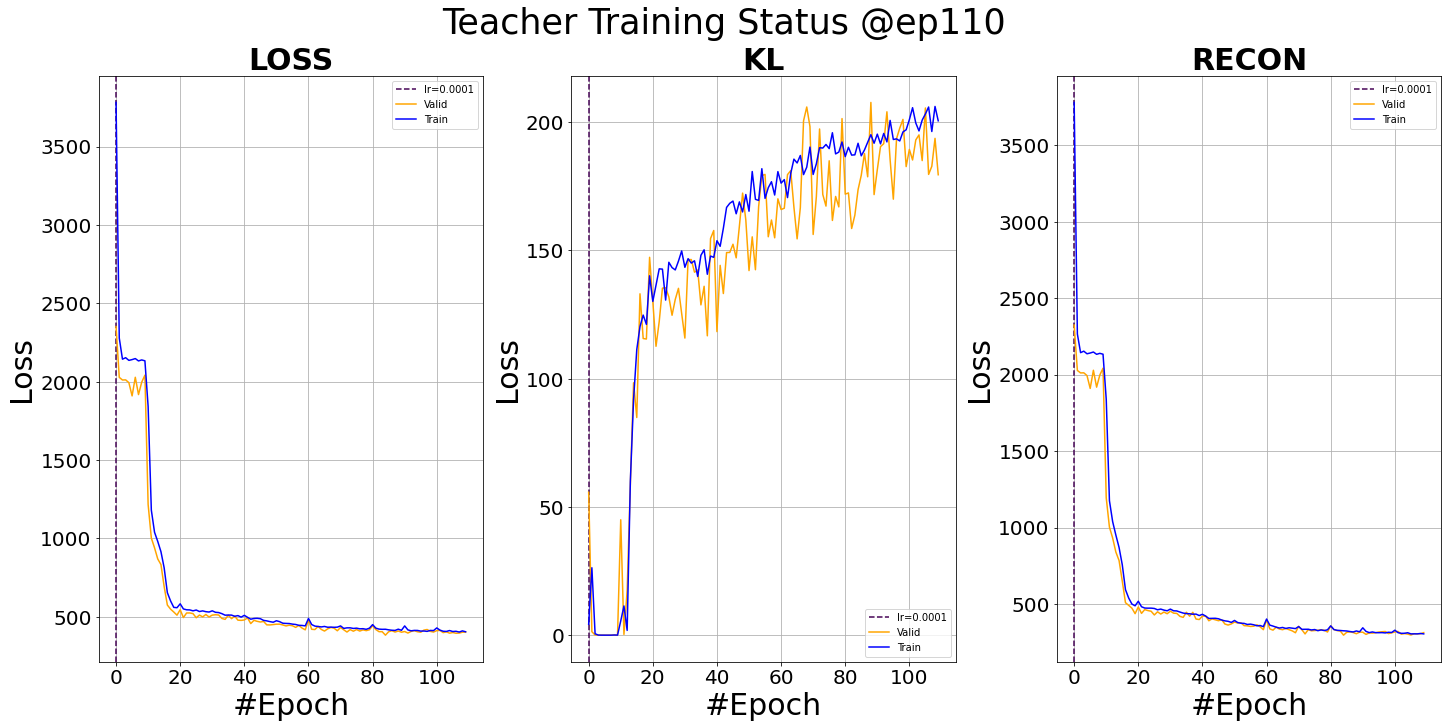

<Figure size 1440x720 with 0 Axes>

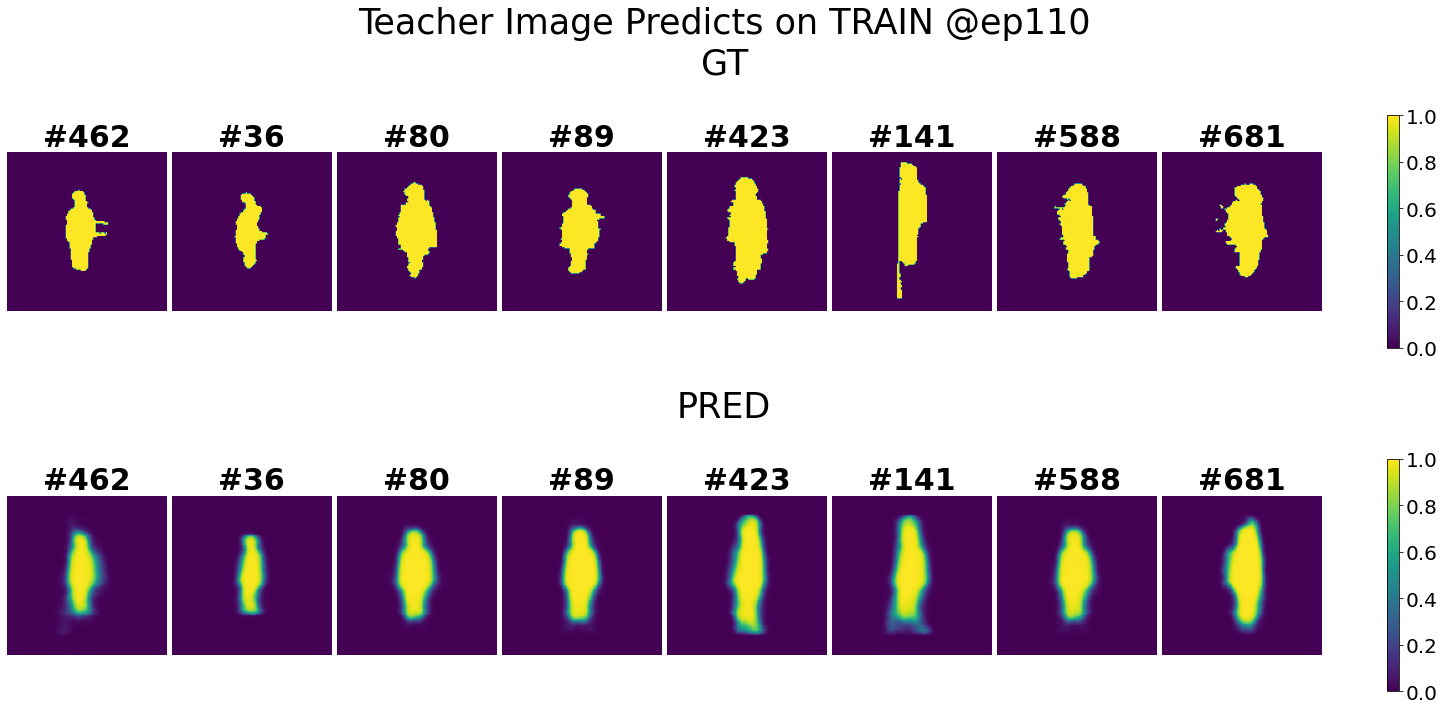

<Figure size 1440x720 with 0 Axes>

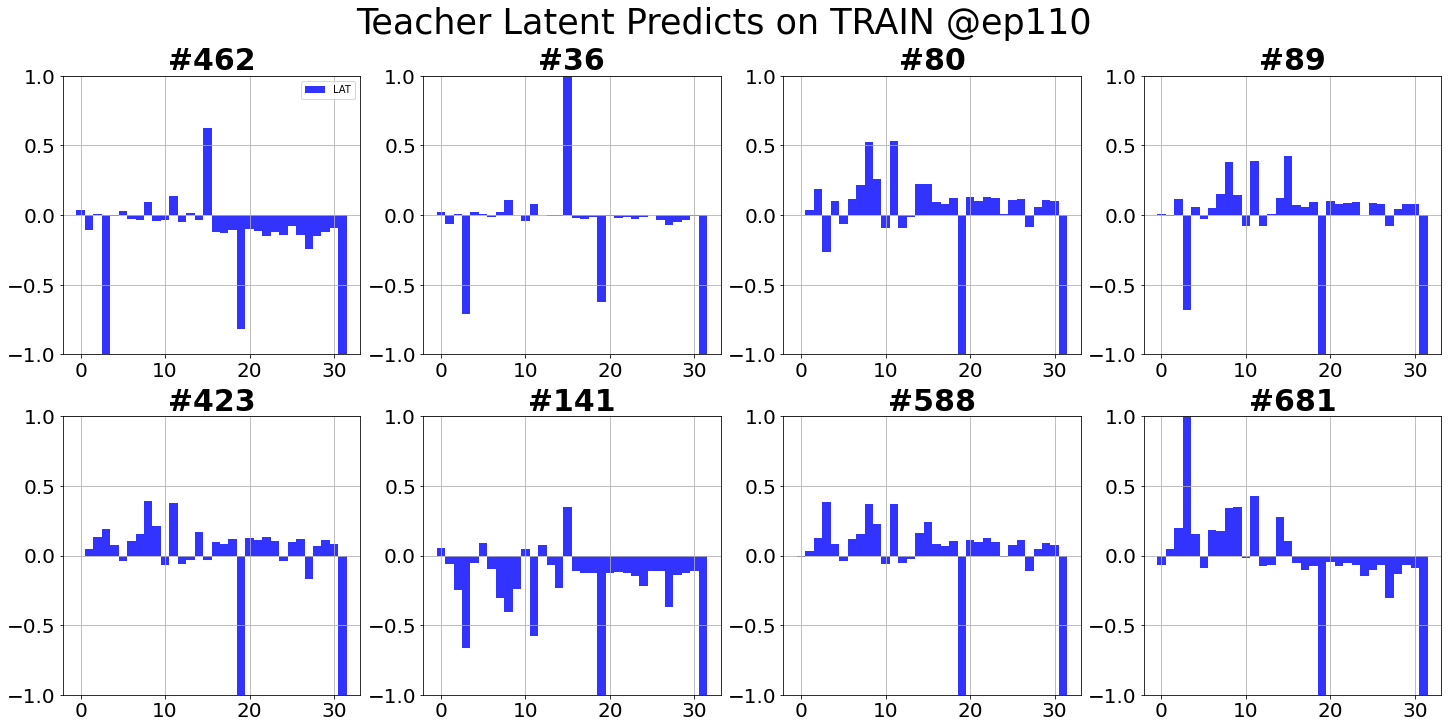

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=366.7417        =366.7417    
Total training time: 49.030906677246094 sec
Teacher test: sample=10/15, loss=156.6956    
Test finished. Average loss={'LOSS': 305.9168478727341, 'KL': 3.1268639942010243, 'RECON': 304.3534159501394}

Total training time: 4.965906143188477 sec


<Figure size 1440x720 with 0 Axes>

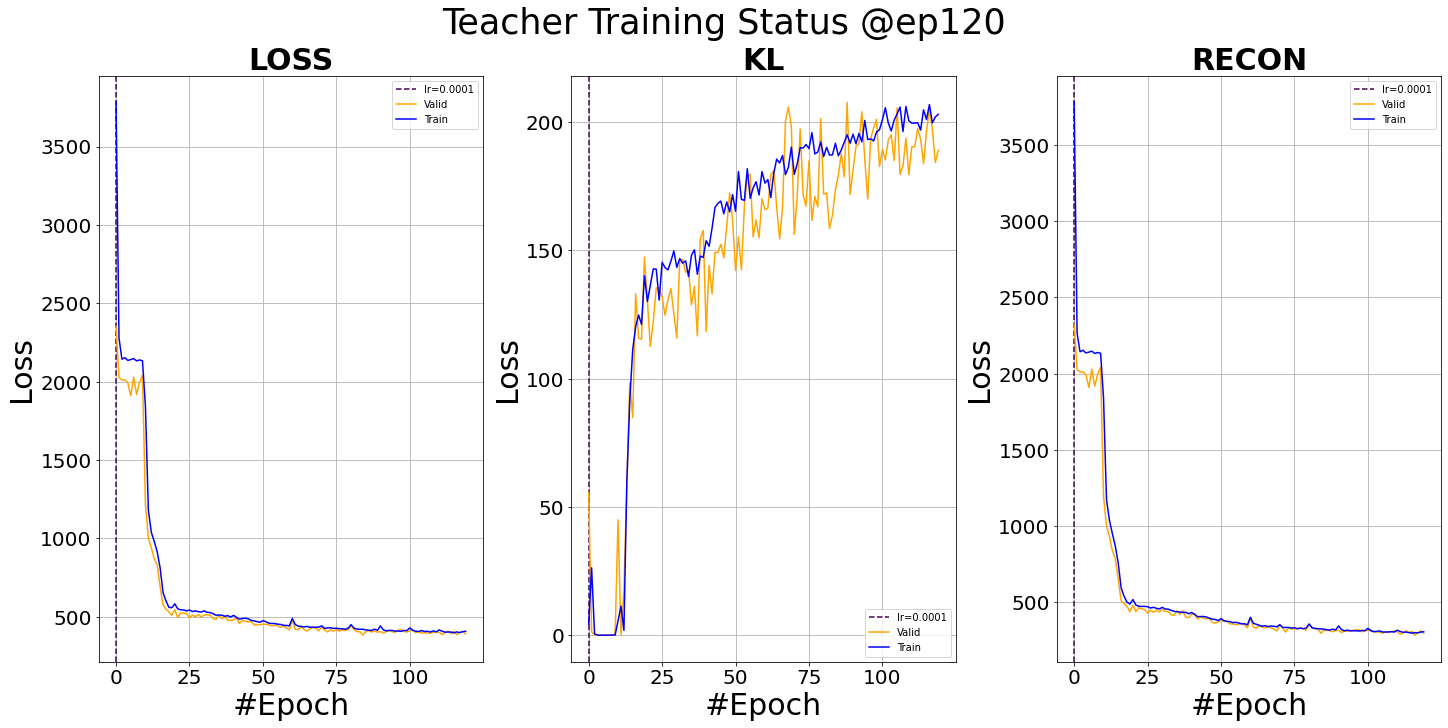

<Figure size 1440x720 with 0 Axes>

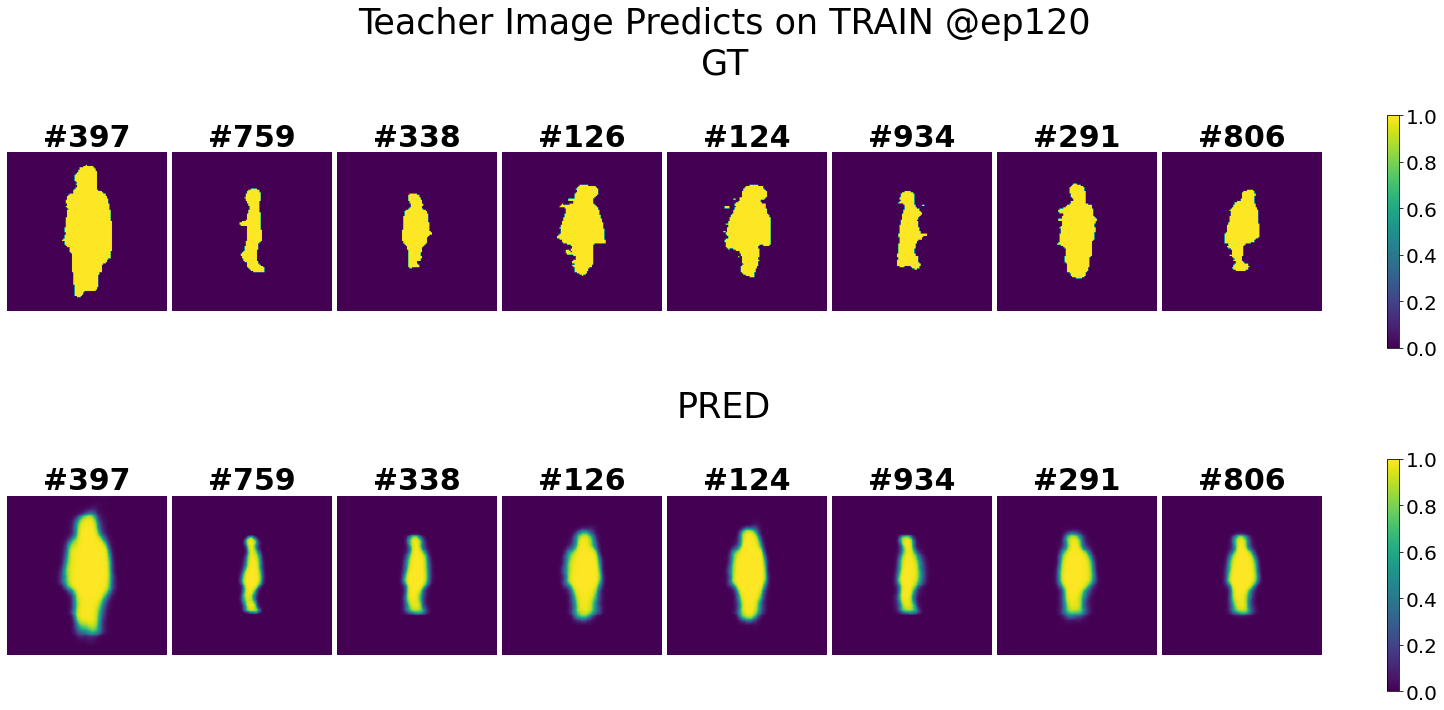

<Figure size 1440x720 with 0 Axes>

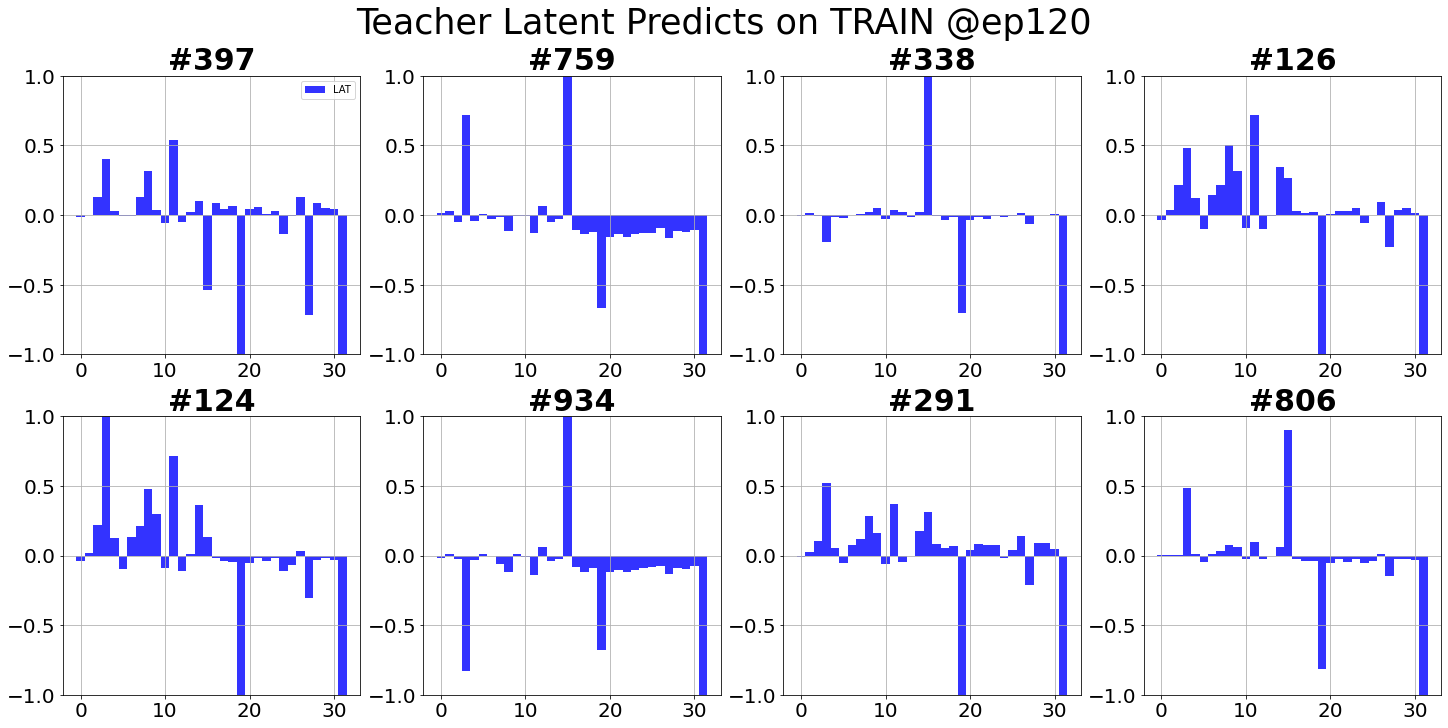

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=366.7417        =366.7417    
Total training time: 49.442769050598145 sec
Teacher test: sample=10/15, loss=654.1013    
Test finished. Average loss={'LOSS': 290.3458620468775, 'KL': 3.4416303926457963, 'RECON': 288.6250471353531}

Total training time: 4.911972999572754 sec


<Figure size 1440x720 with 0 Axes>

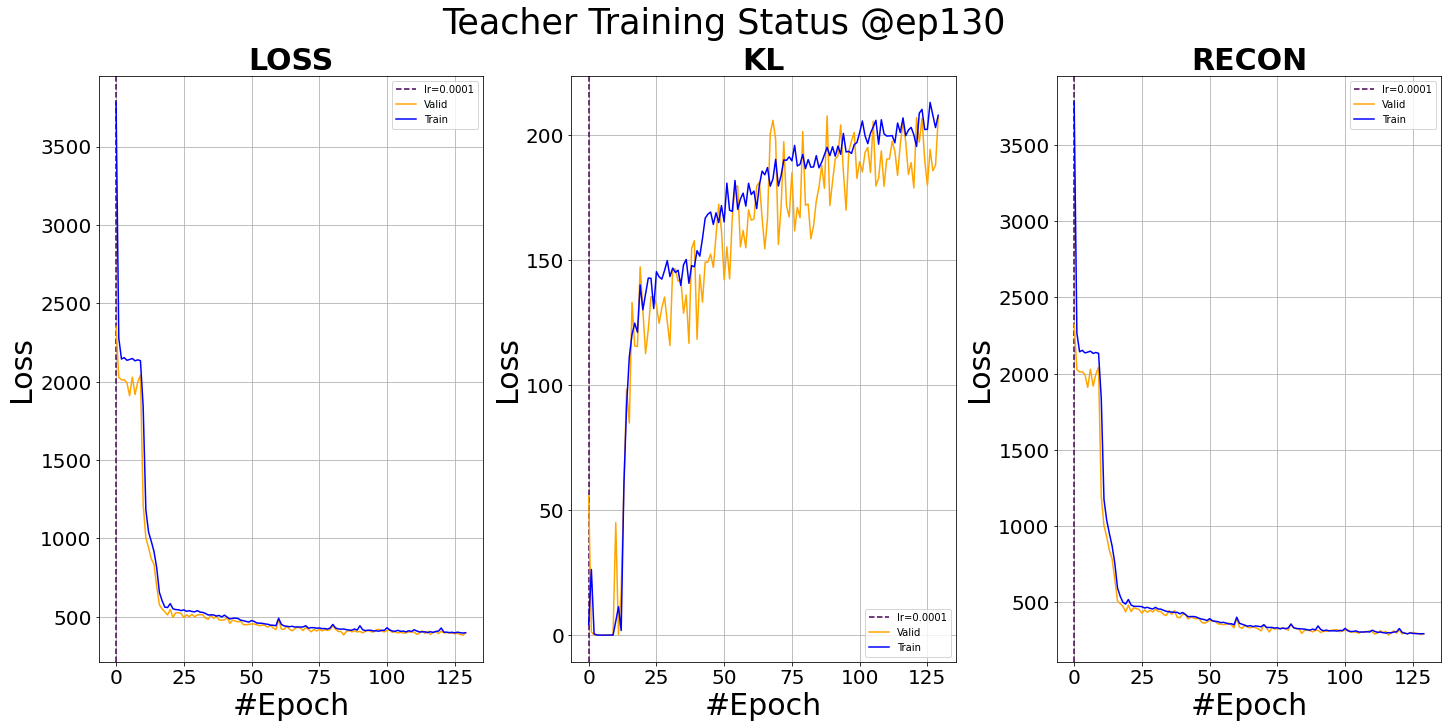

<Figure size 1440x720 with 0 Axes>

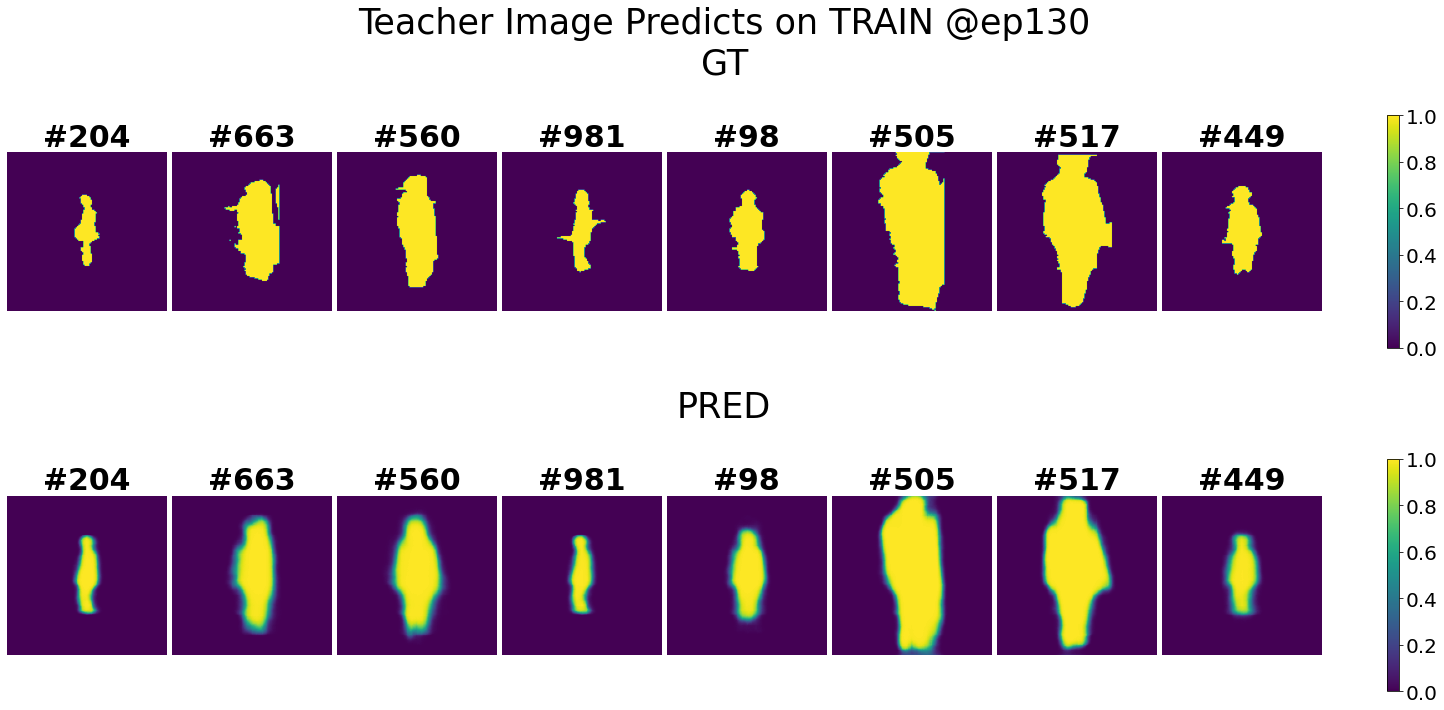

<Figure size 1440x720 with 0 Axes>

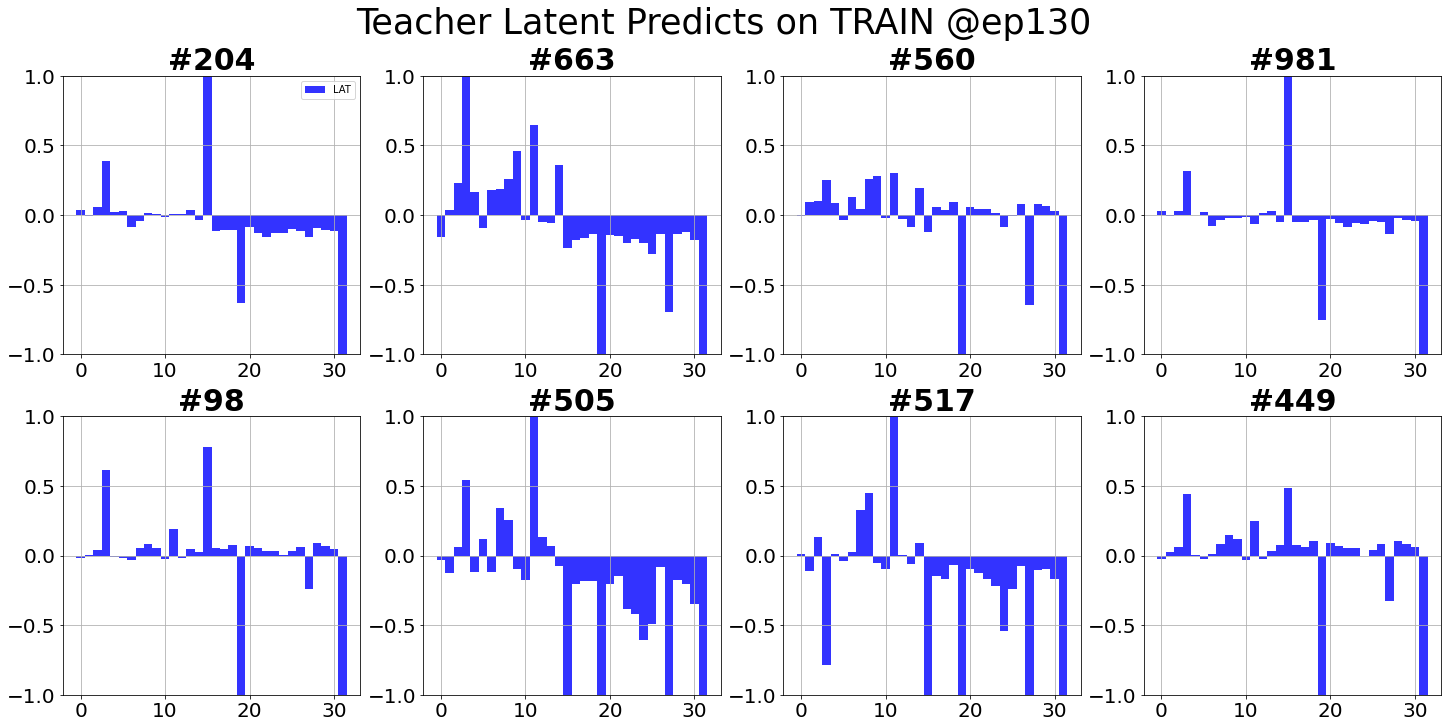

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=362.3170        =362.3170    
Total training time: 49.186503171920776 sec
Teacher test: sample=10/15, loss=311.0227    
Test finished. Average loss={'LOSS': 278.4530918598175, 'KL': 3.4408157357325155, 'RECON': 276.73268418312074}

Total training time: 4.931448221206665 sec


<Figure size 1440x720 with 0 Axes>

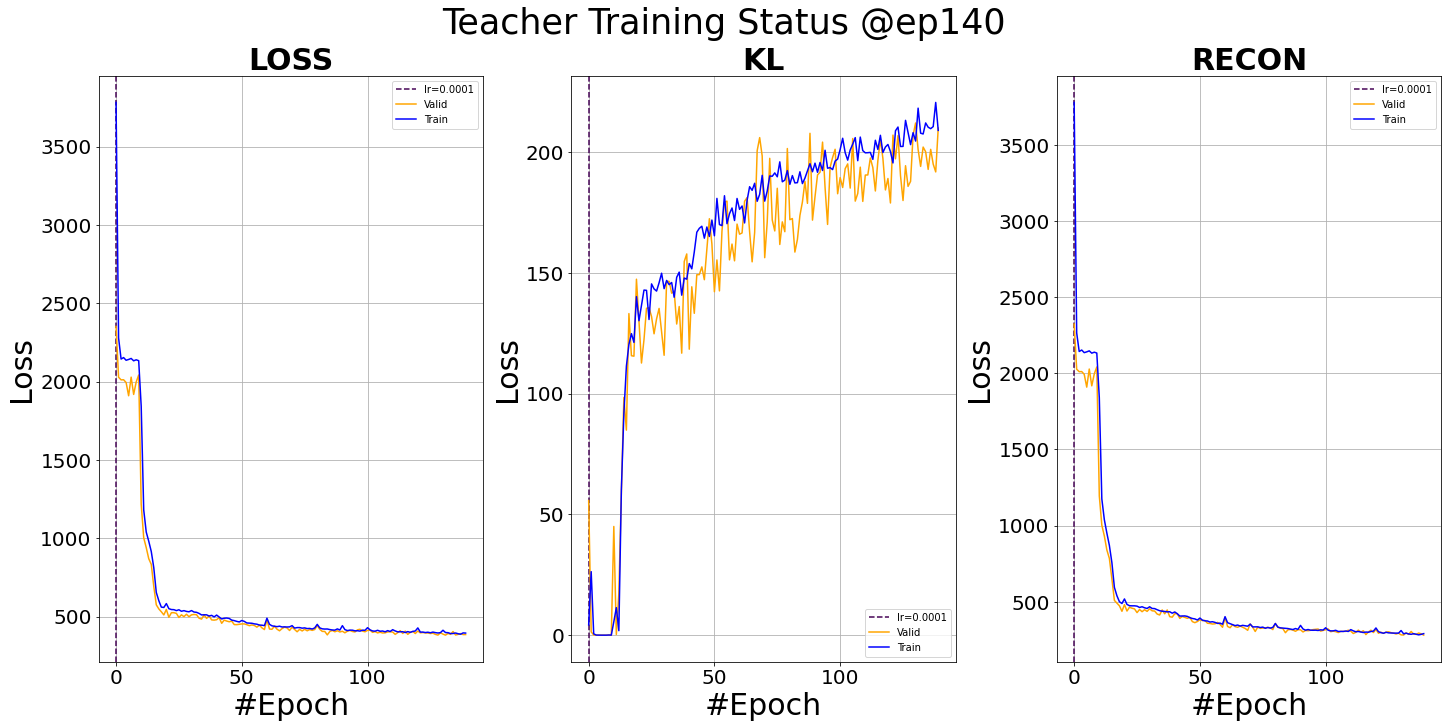

<Figure size 1440x720 with 0 Axes>

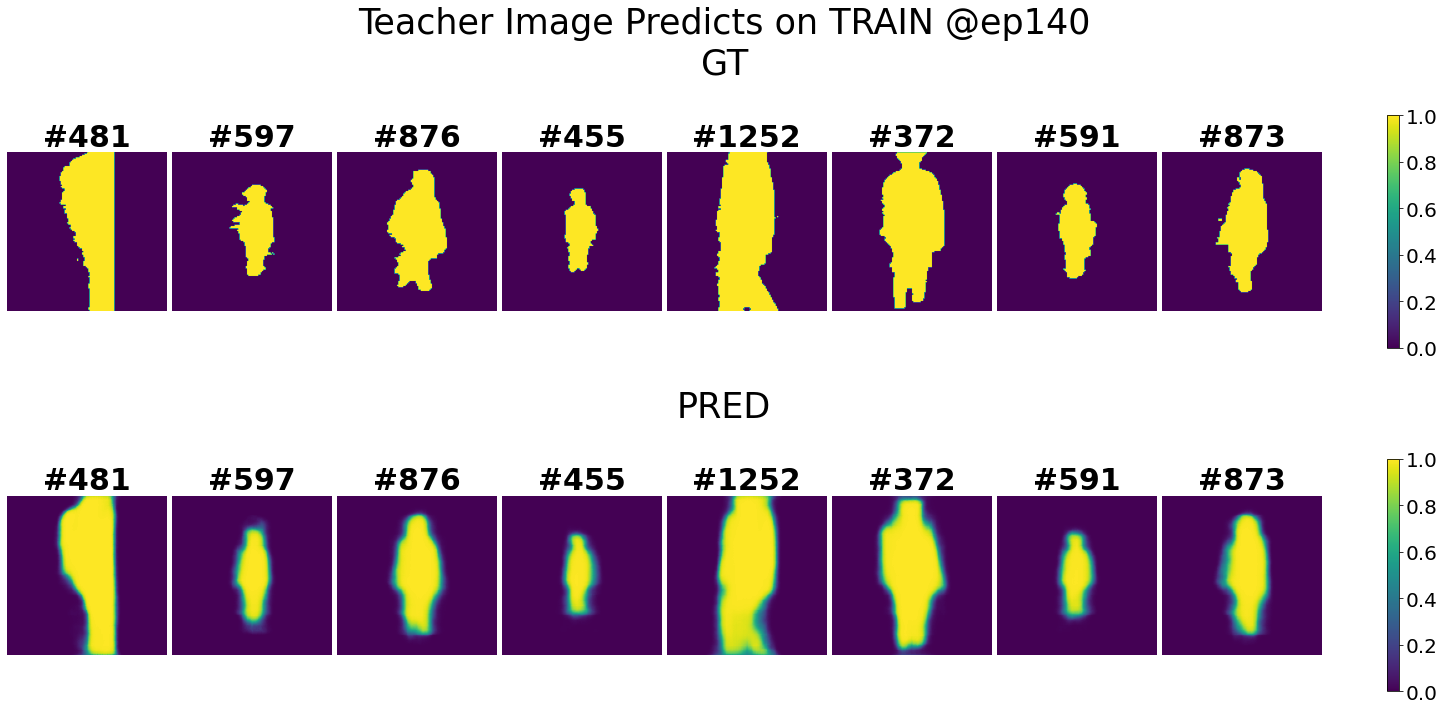

<Figure size 1440x720 with 0 Axes>

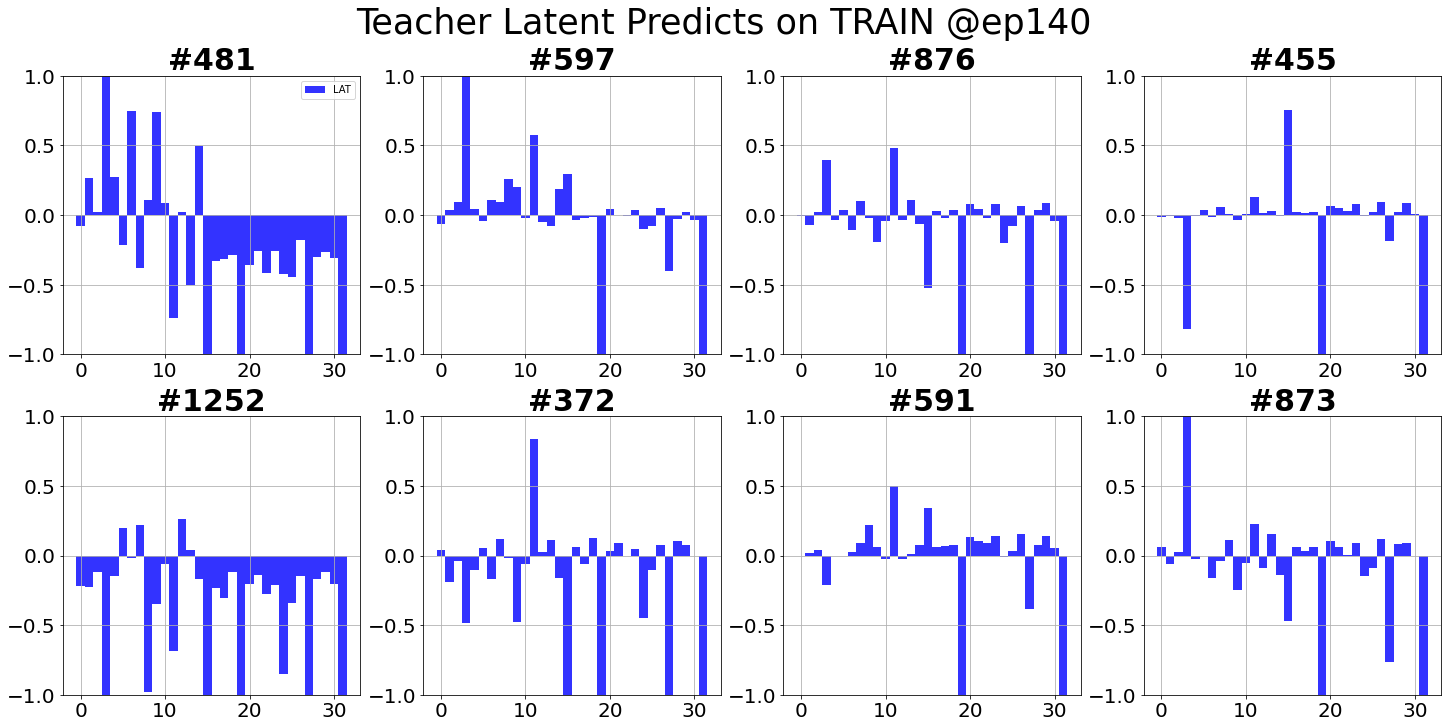

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=360.0802        =360.0802    
Total training time: 50.986427783966064 sec
Teacher test: sample=10/15, loss=417.1420    
Test finished. Average loss={'LOSS': 280.11835532188417, 'KL': 3.4096895799040796, 'RECON': 278.41351075172423}

Total training time: 5.028881549835205 sec


<Figure size 1440x720 with 0 Axes>

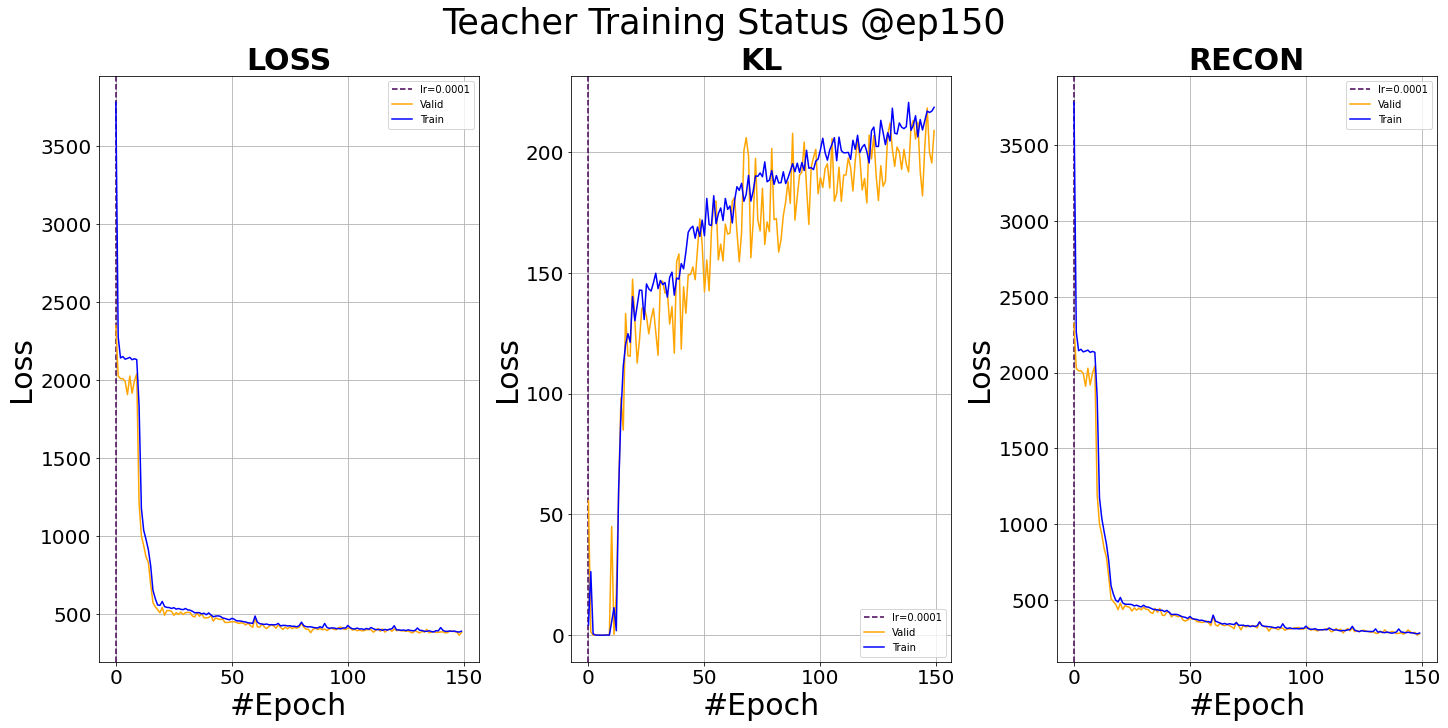

<Figure size 1440x720 with 0 Axes>

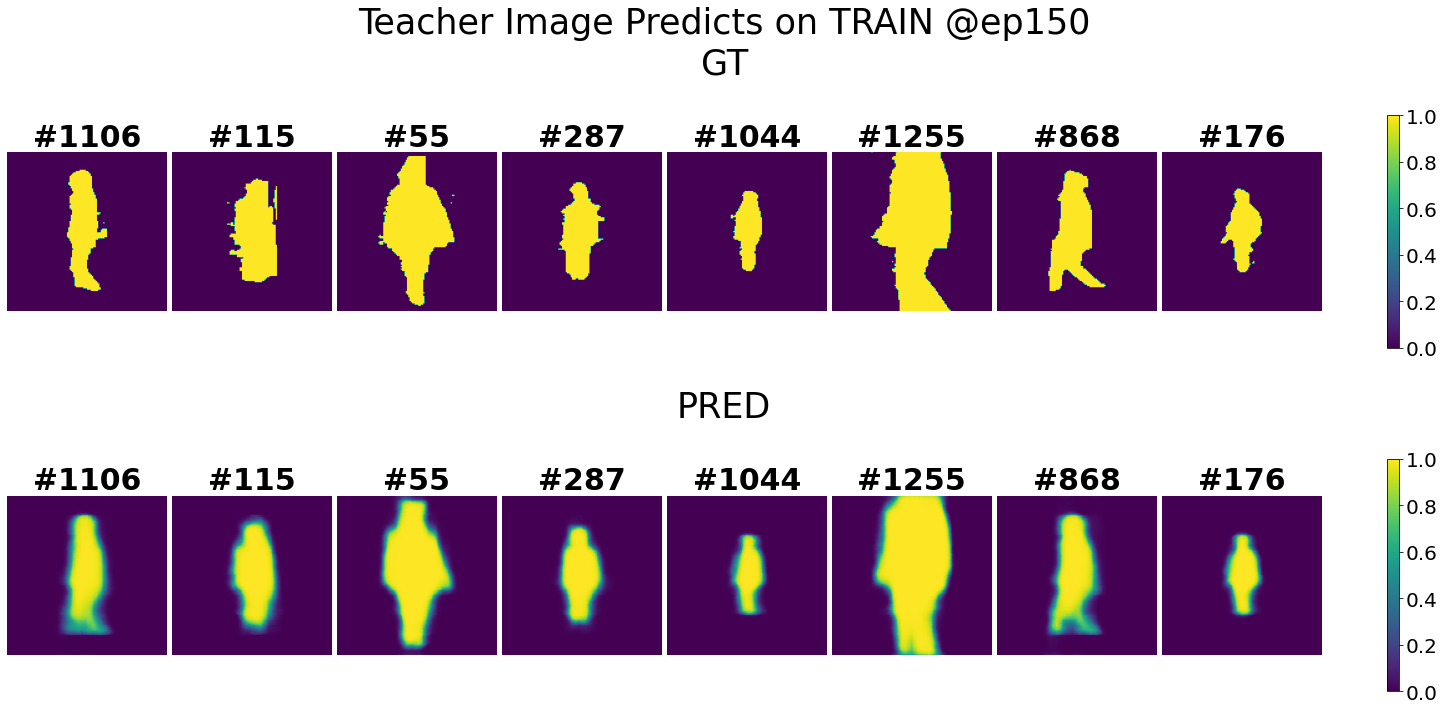

<Figure size 1440x720 with 0 Axes>

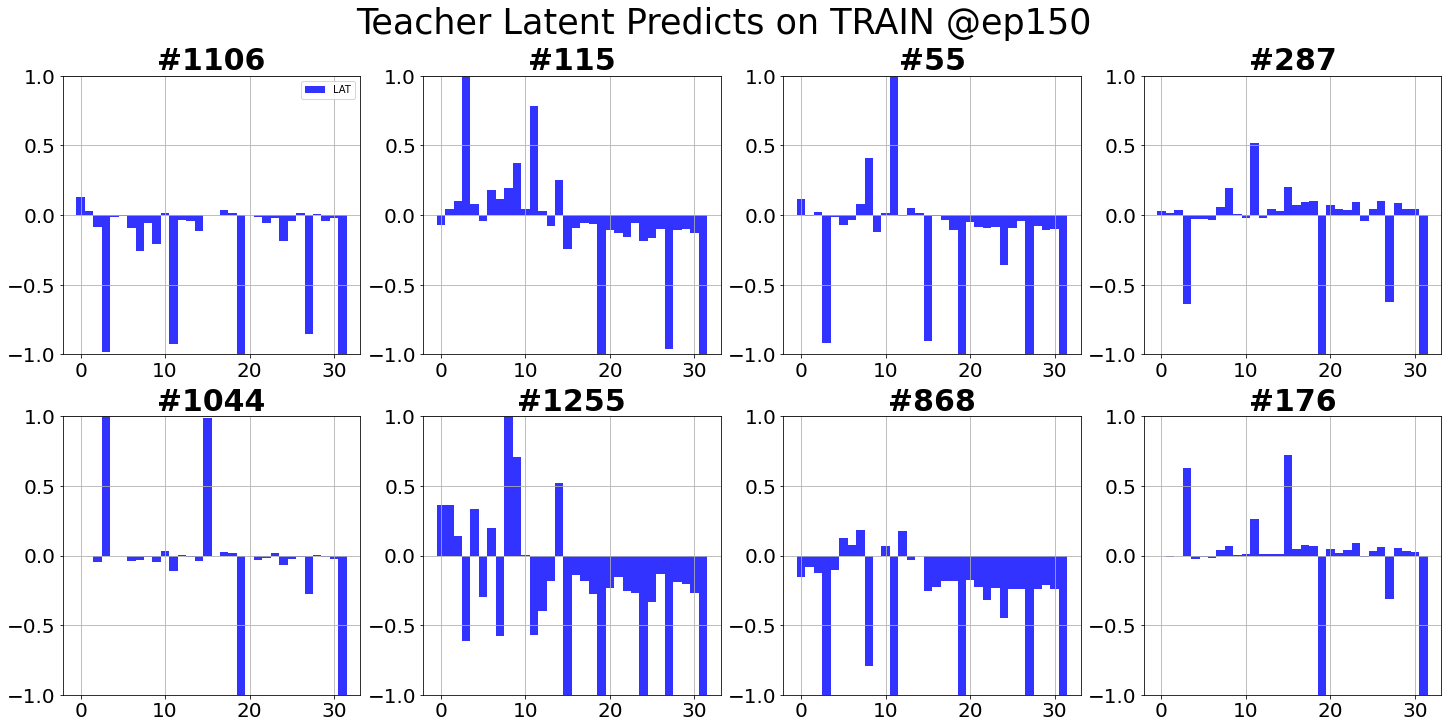

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=360.0802        =360.0802    
Total training time: 49.35421013832092 sec
Teacher test: sample=10/15, loss=352.1256    
Test finished. Average loss={'LOSS': 275.47973120212555, 'KL': 3.444414661824703, 'RECON': 273.75752391020455}

Total training time: 5.030165672302246 sec


<Figure size 1440x720 with 0 Axes>

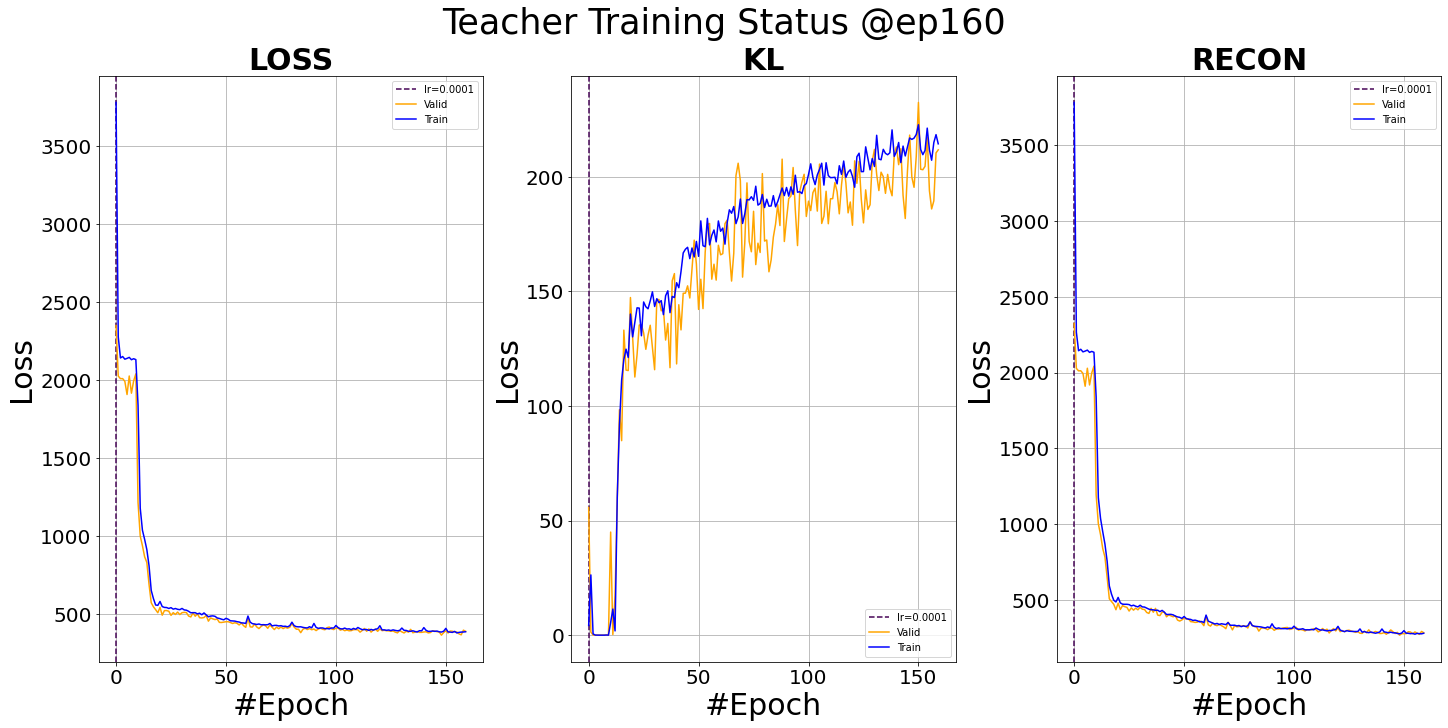

<Figure size 1440x720 with 0 Axes>

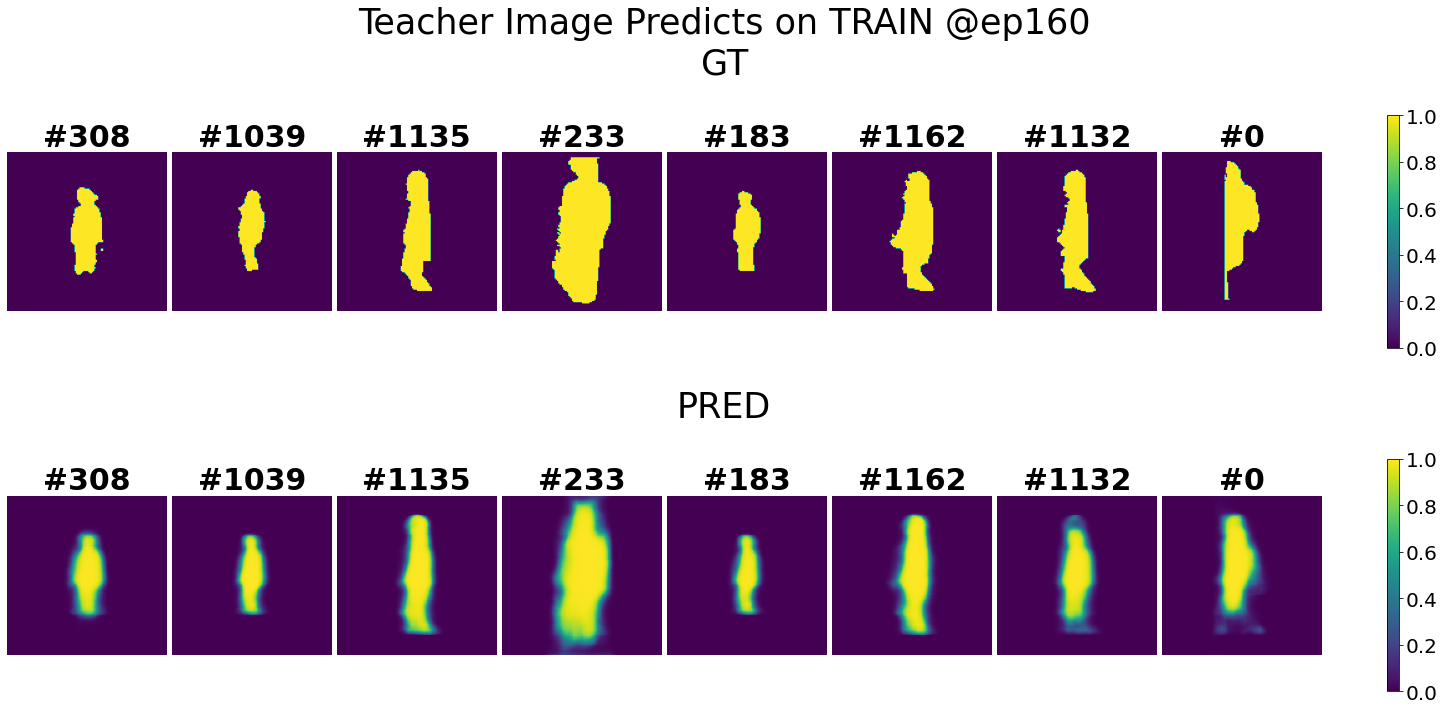

<Figure size 1440x720 with 0 Axes>

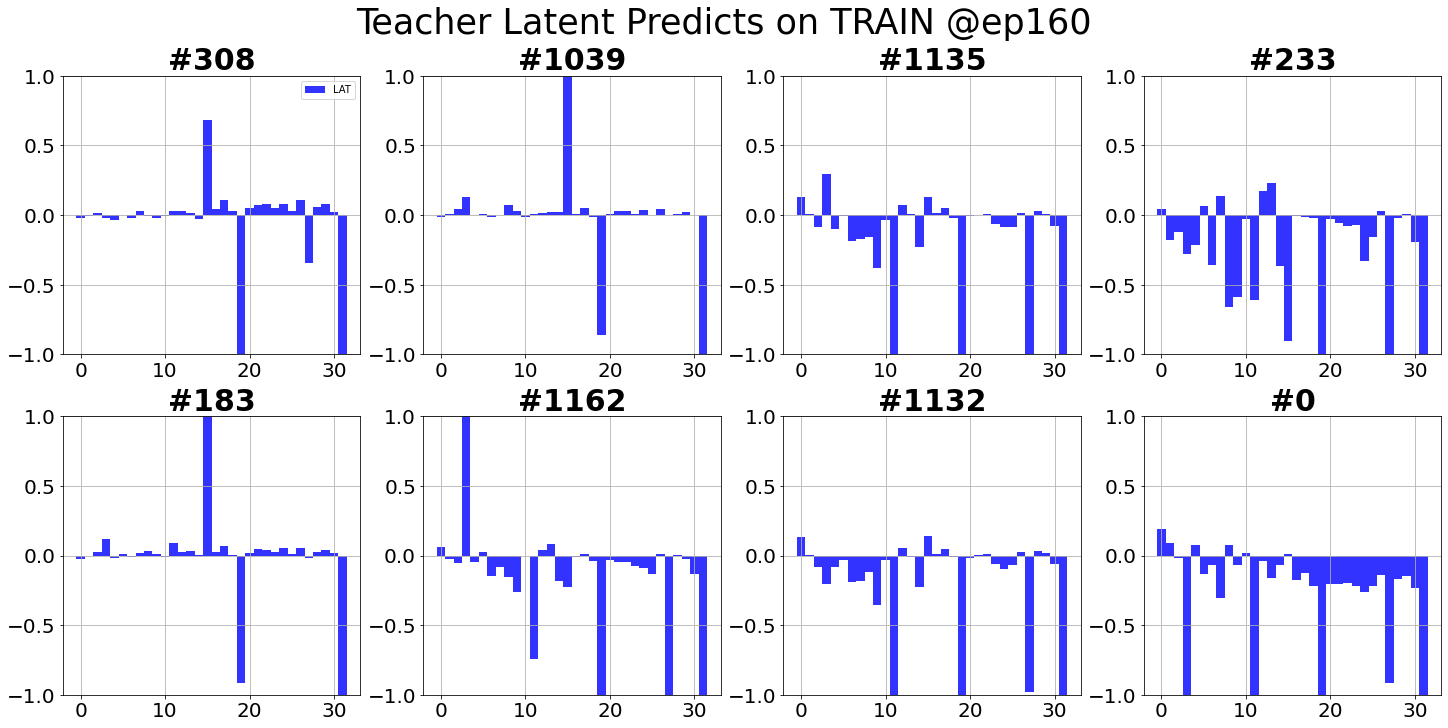

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=360.0802        =360.0802    
Total training time: 50.26398539543152 sec
Teacher test: sample=10/15, loss=241.6010    
Test finished. Average loss={'LOSS': 271.2818320671717, 'KL': 3.447934238240123, 'RECON': 269.55786476929984}

Total training time: 4.977901935577393 sec


<Figure size 1440x720 with 0 Axes>

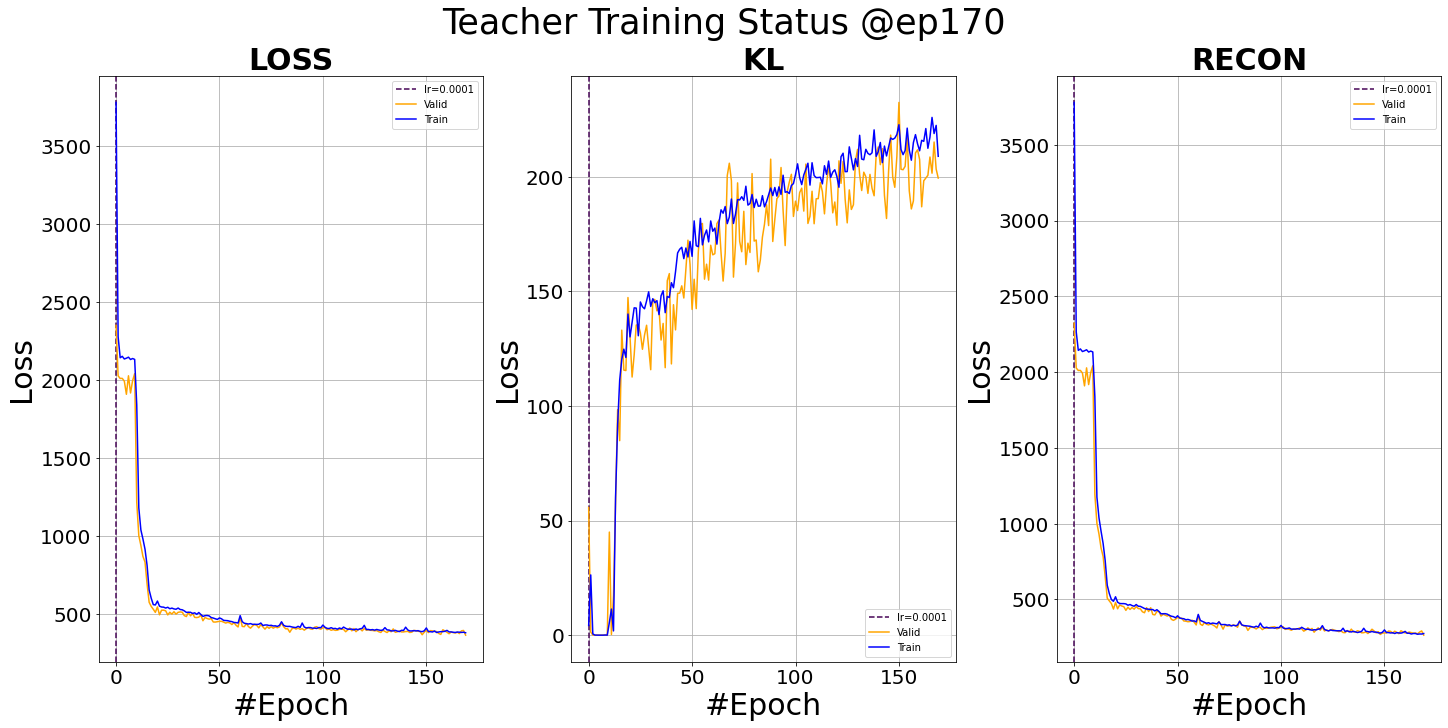

<Figure size 1440x720 with 0 Axes>

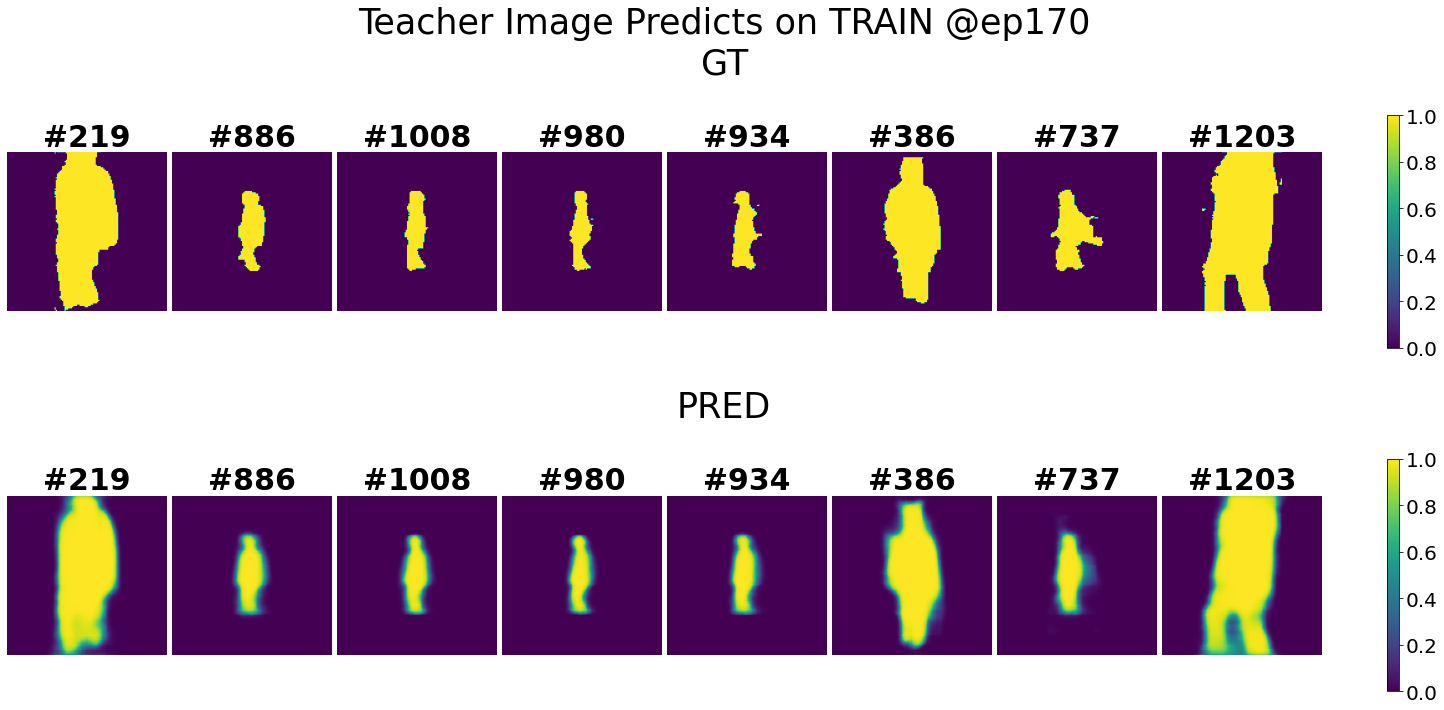

<Figure size 1440x720 with 0 Axes>

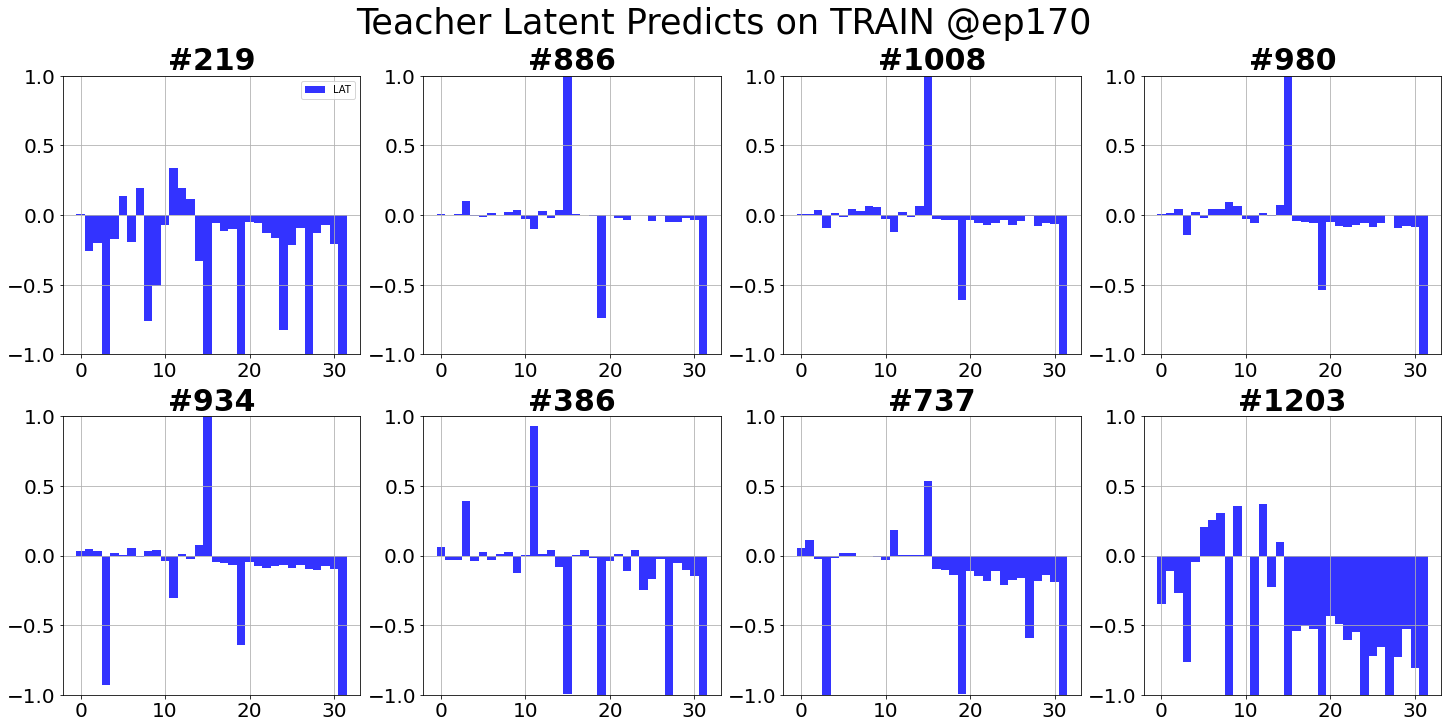

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=360.0802        =360.0802    
Total training time: 49.30554938316345 sec
Teacher test: sample=10/15, loss=356.8081    
Test finished. Average loss={'LOSS': 269.3228821118673, 'KL': 3.400584090376894, 'RECON': 267.6225900173187}

Total training time: 4.9674460887908936 sec


<Figure size 1440x720 with 0 Axes>

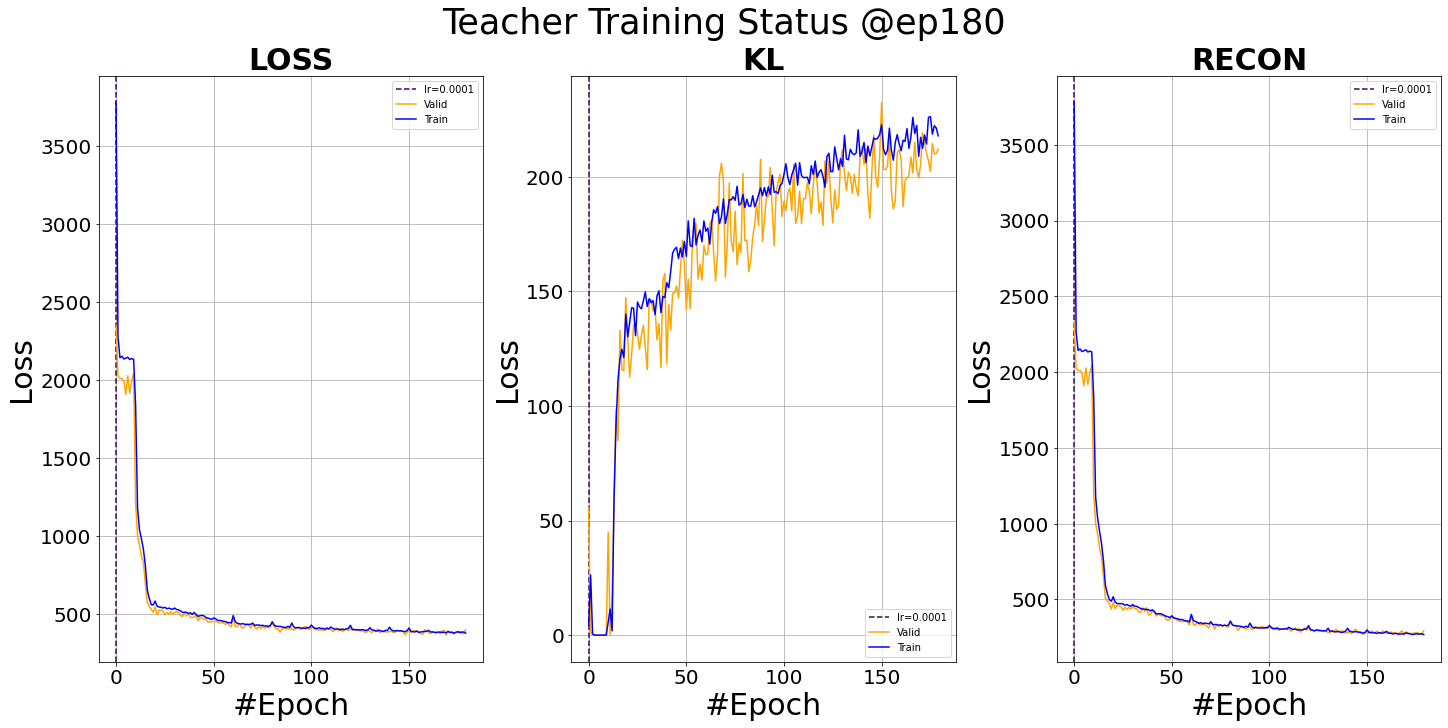

<Figure size 1440x720 with 0 Axes>

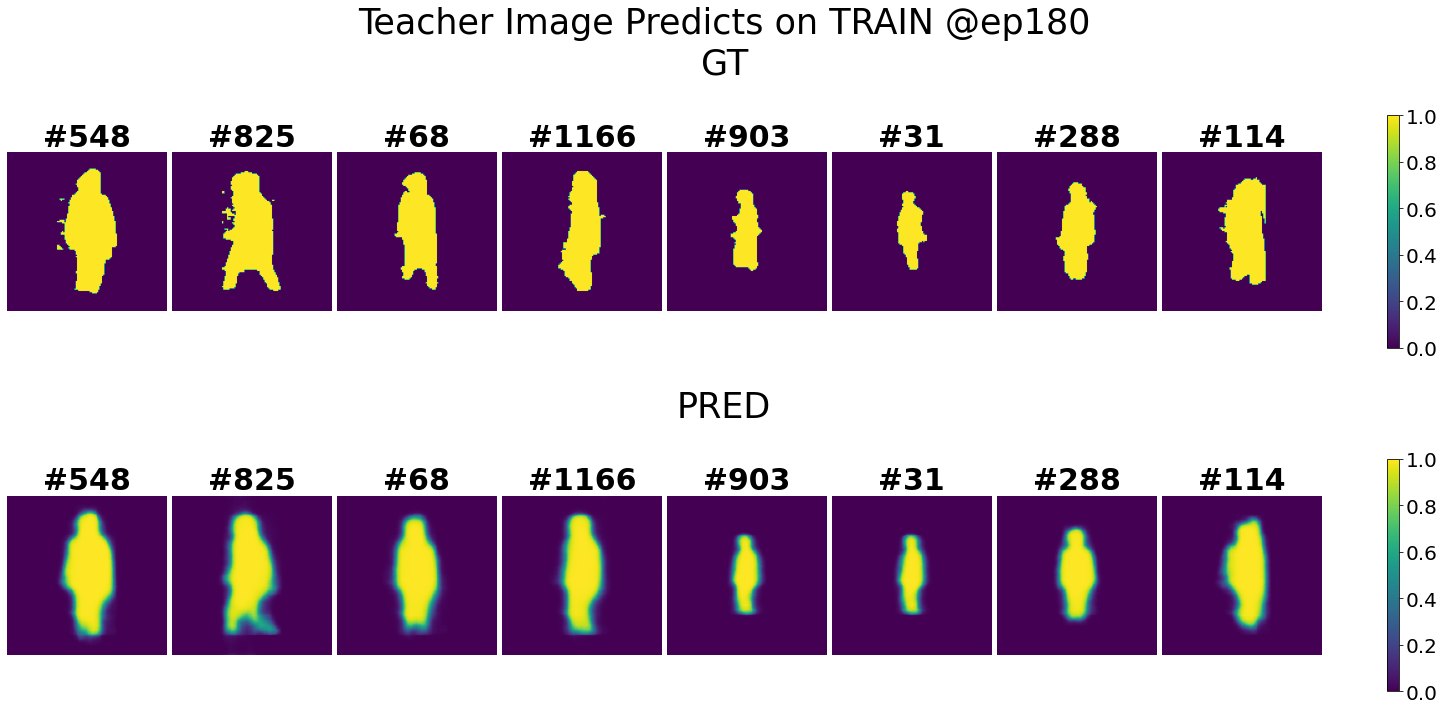

<Figure size 1440x720 with 0 Axes>

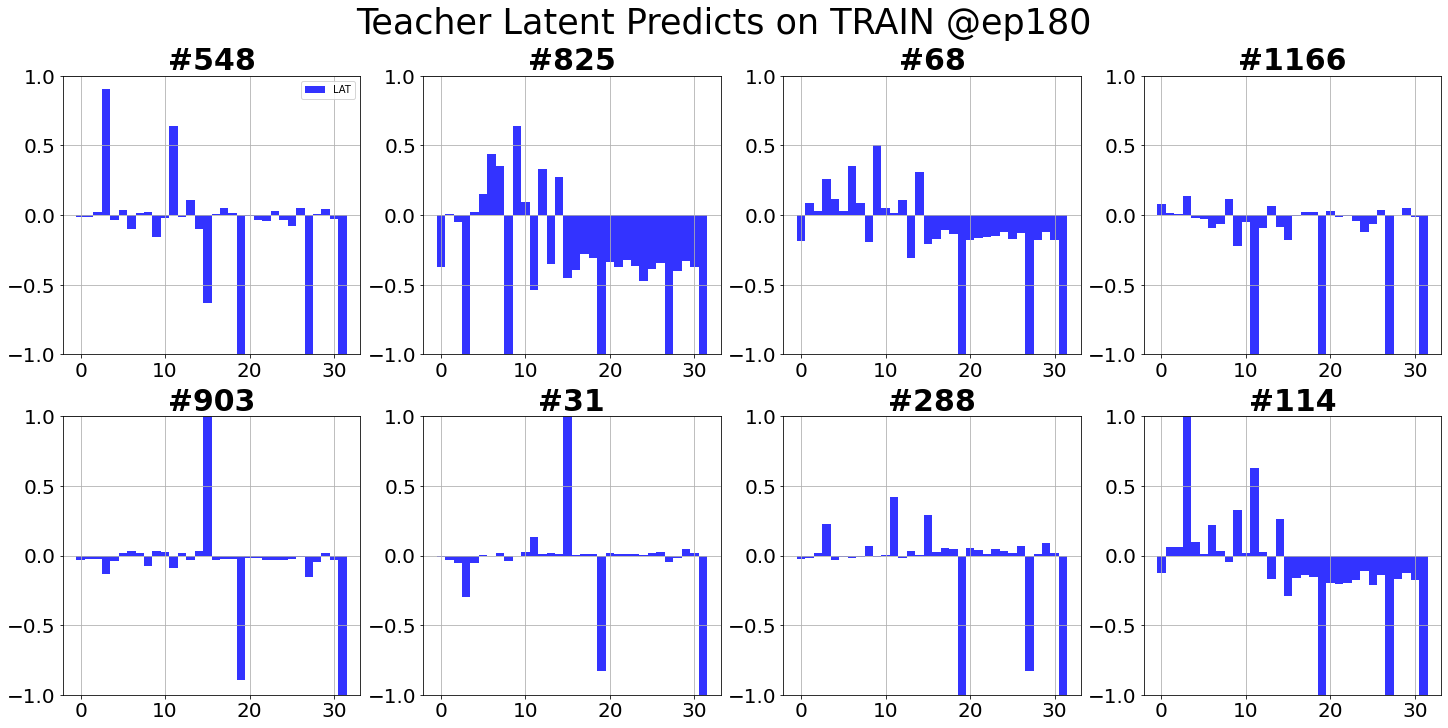

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=348.2068        =348.2068    
Total training time: 49.87620687484741 sec
Teacher test: sample=10/15, loss=425.6569    
Test finished. Average loss={'LOSS': 263.31378479798633, 'KL': 3.5777397158245248, 'RECON': 261.5249148050944}

Total training time: 4.915942192077637 sec


<Figure size 1440x720 with 0 Axes>

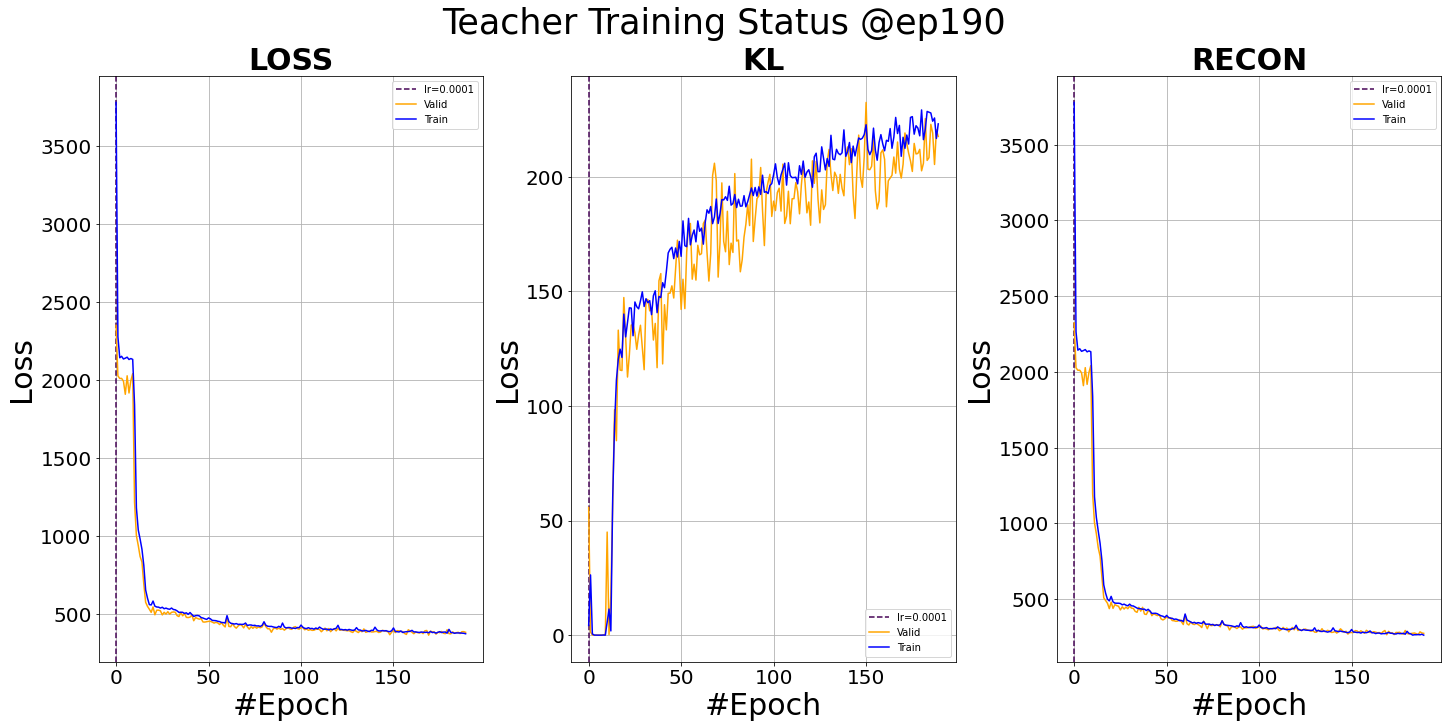

<Figure size 1440x720 with 0 Axes>

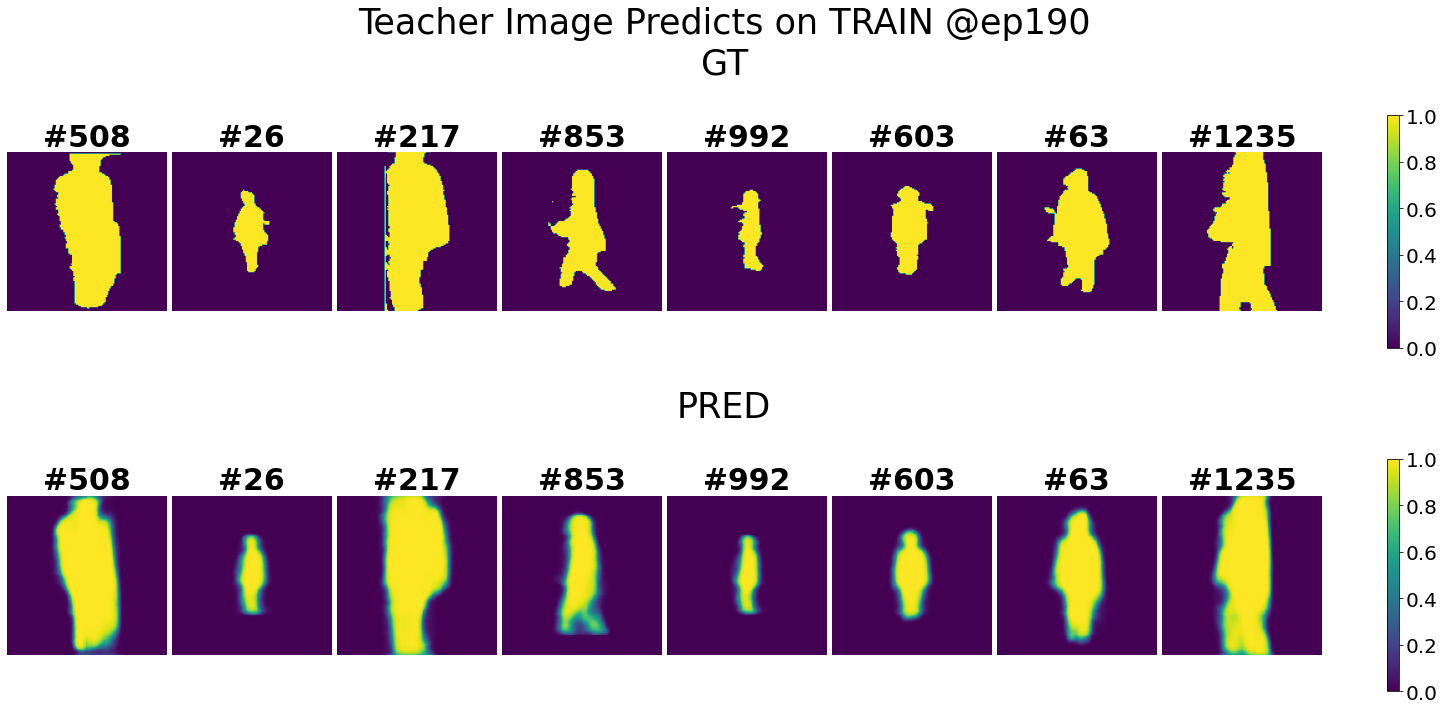

<Figure size 1440x720 with 0 Axes>

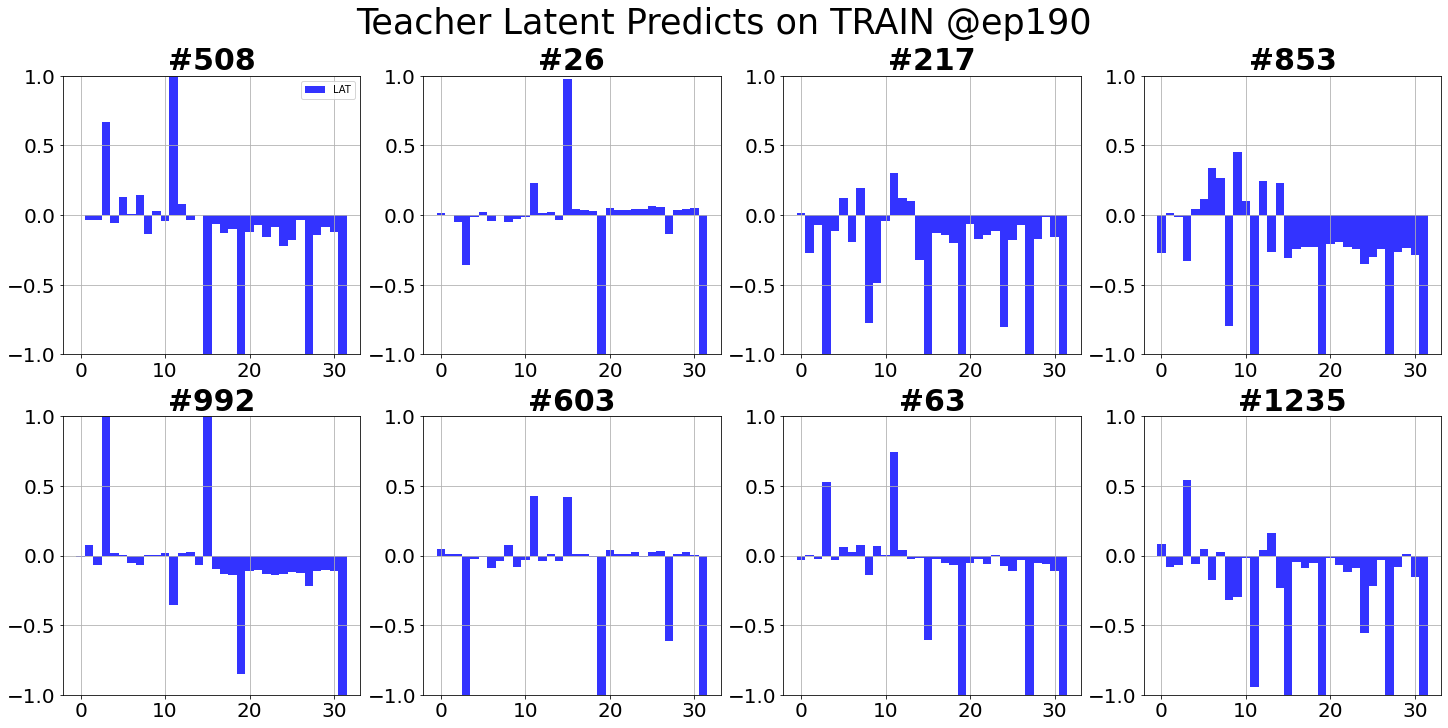

Teacher valid: epoch=9/10, batch=0/3, current best valid loss=348.2068        =348.2068    
Total training time: 49.47985816001892 sec
Teacher test: sample=10/15, loss=257.2715    
Test finished. Average loss={'LOSS': 258.8277511994044, 'KL': 3.642240189636747, 'RECON': 257.0066312154134}

Total training time: 4.980345726013184 sec


<Figure size 1440x720 with 0 Axes>

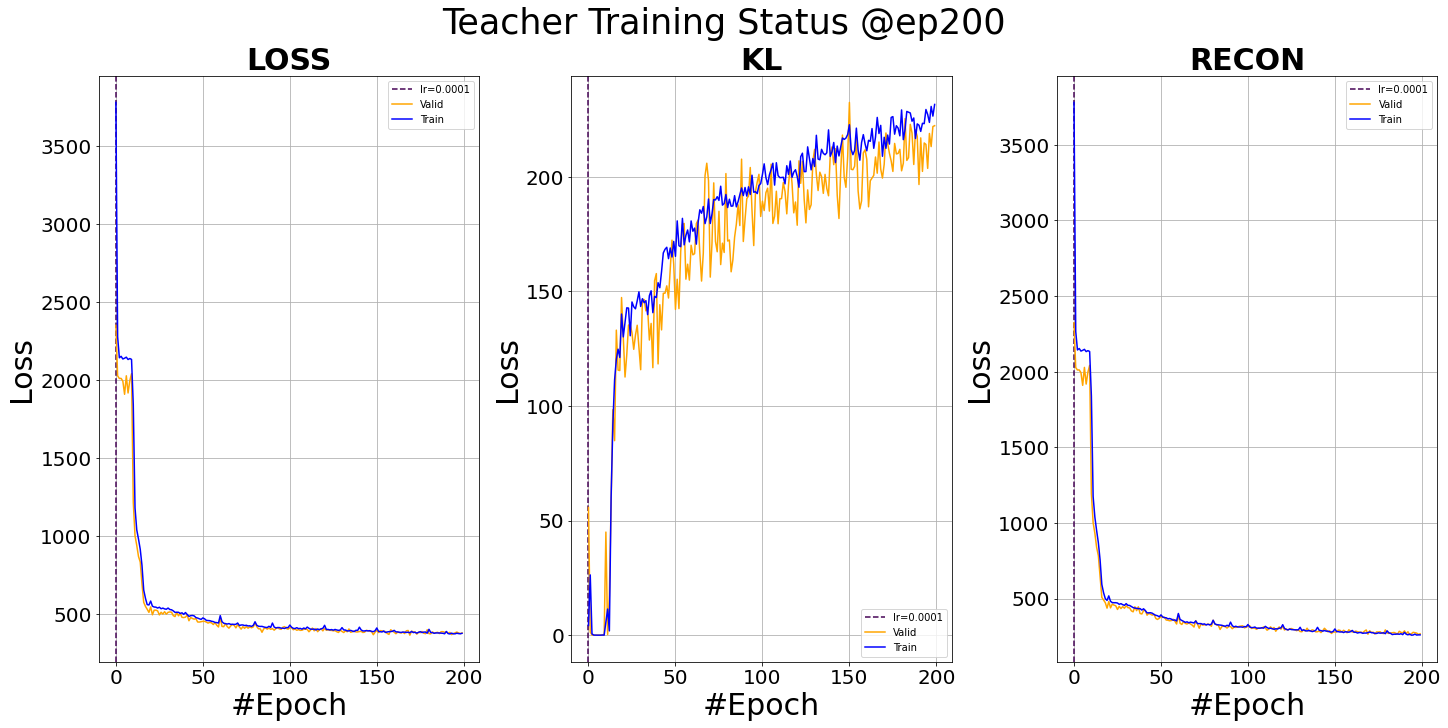

<Figure size 1440x720 with 0 Axes>

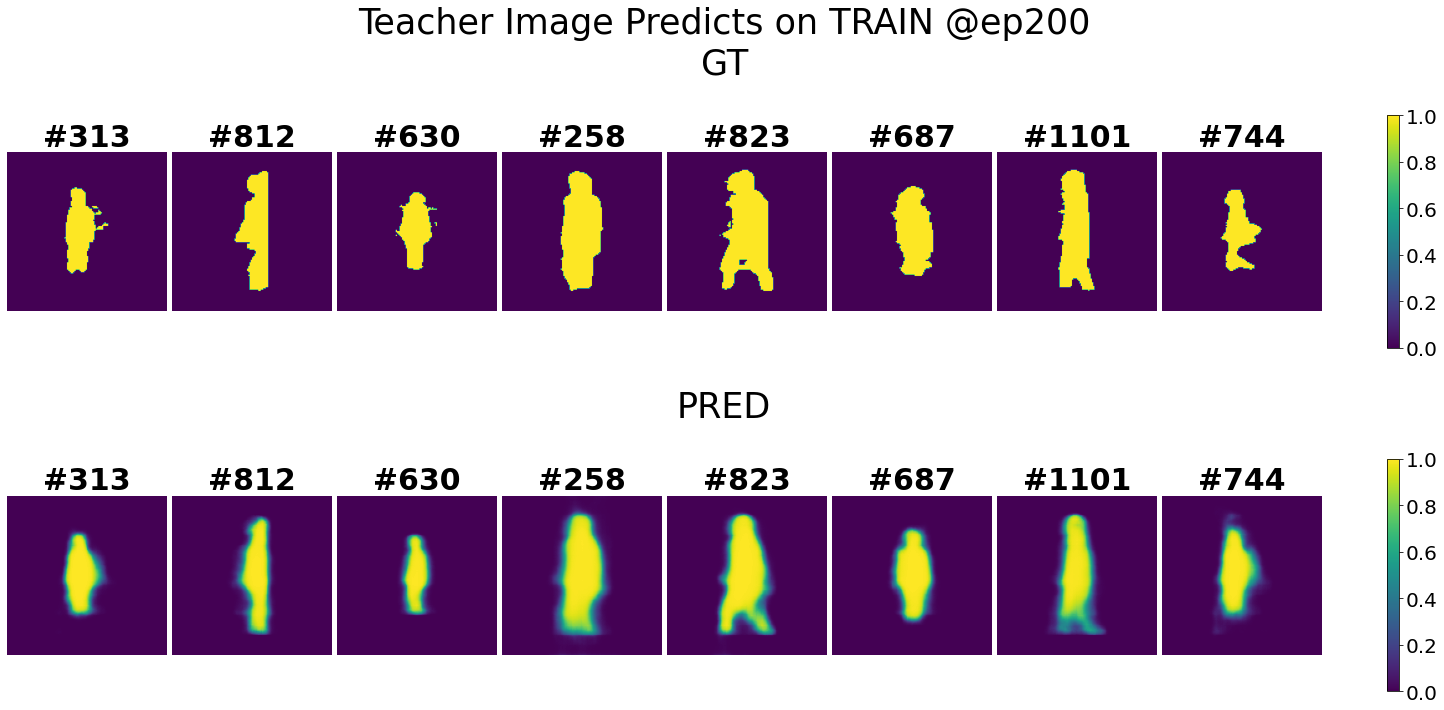

<Figure size 1440x720 with 0 Axes>

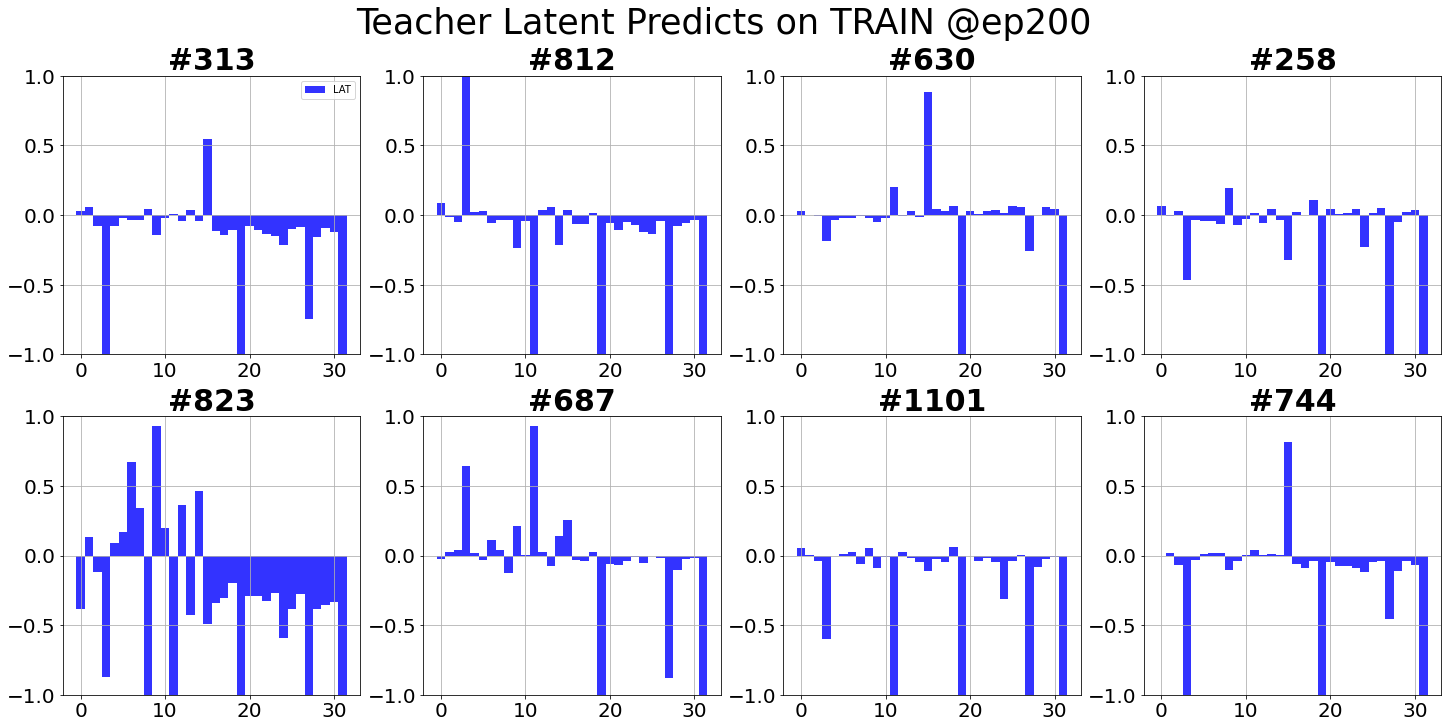


Schedule Completed!


In [8]:
### Scheduler
%matplotlib inline
T_trained = T_trainer.train(autosave=True, notion=f"{date}_{run}")
T_trainer.plot_train_loss(autosave=True, notion=f"{date}_{run}")

In [ ]:
T_trainer.test(loader='train')
T_trainer.plot_test(select_num=8, autosave=True, notion=f"{date}_{run}")

/home/bob/.local/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py:172: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)
/home/bob/.local/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py:172: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest 

Teacher test: sample=9285/9290, loss=1121.2916    
Test finished. Average loss={'LOSS': 408.8516753969716, 'KL': 3.7918254400736804, 'RECON': 406.95576291202343}

Total training time: 68.09710502624512 sec


<Figure size 1440x720 with 0 Axes>

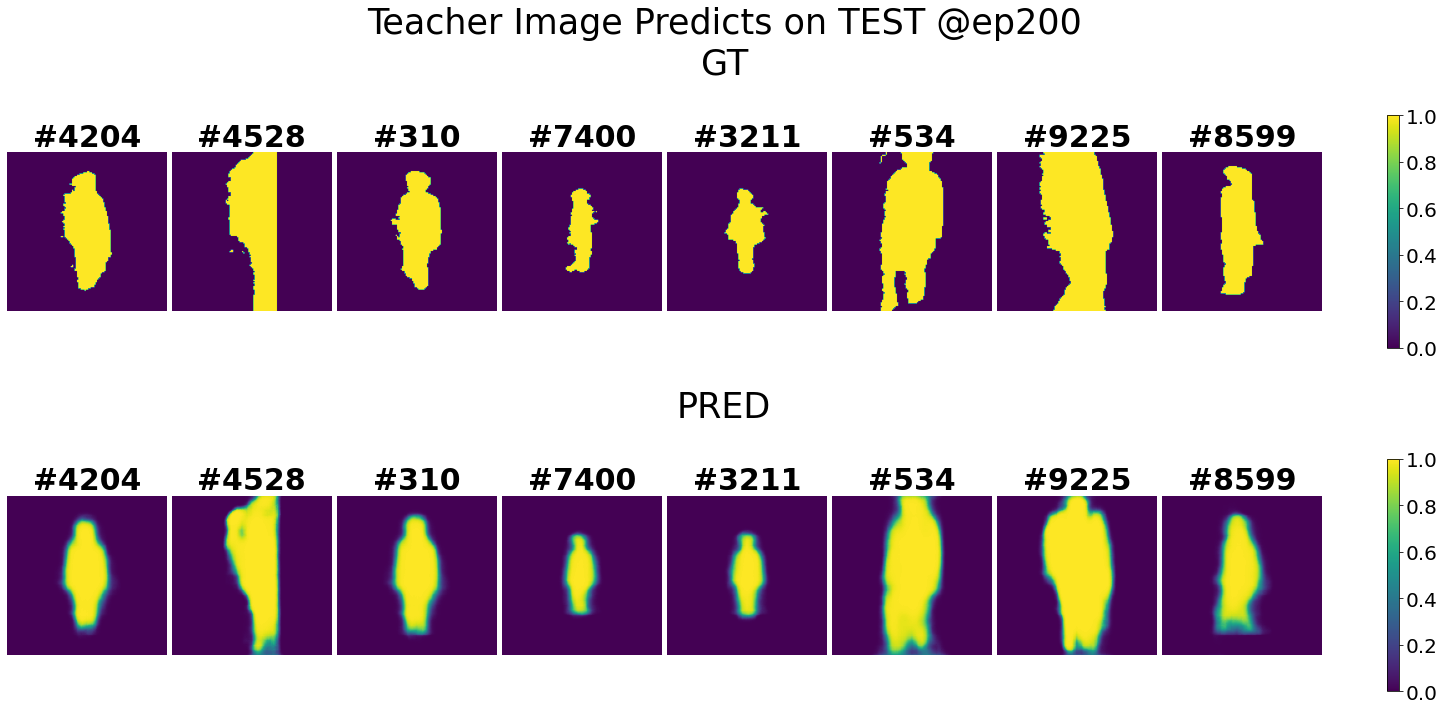

<Figure size 1440x720 with 0 Axes>

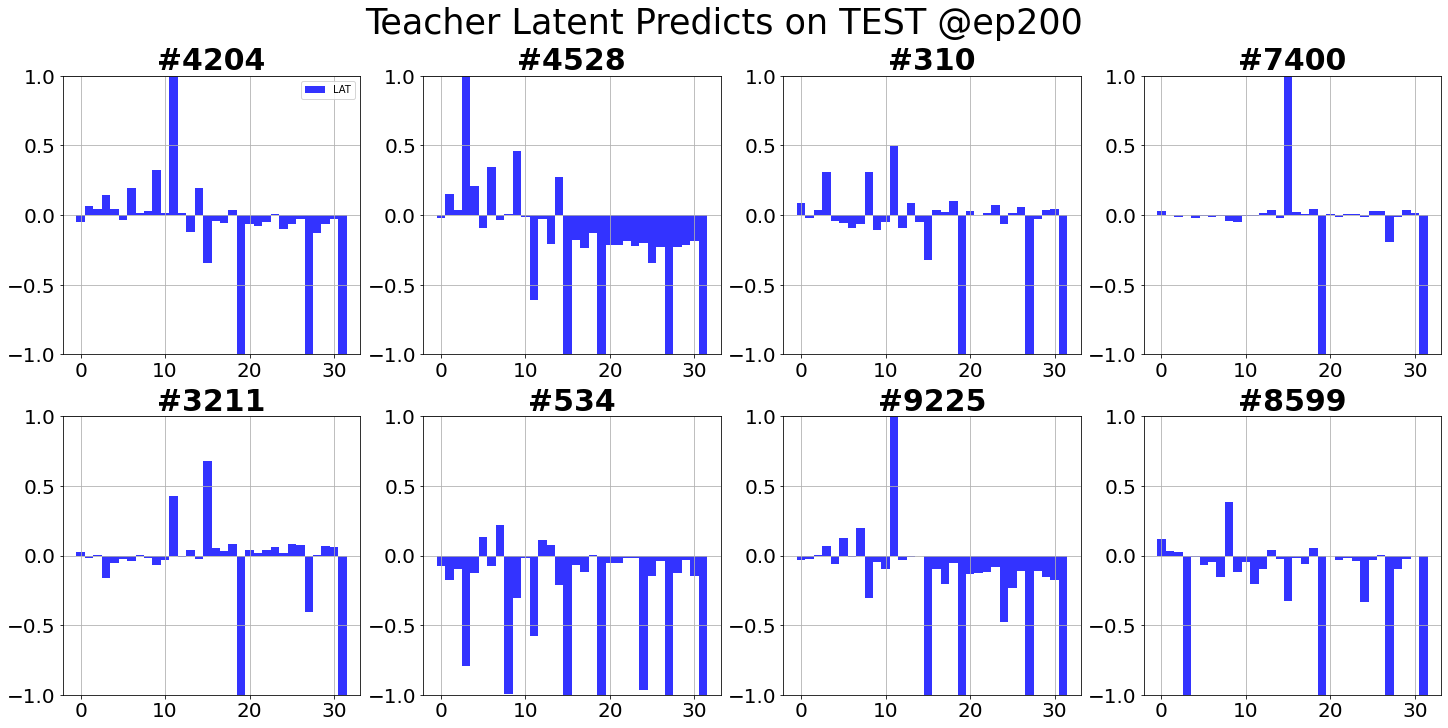

In [9]:
T_trainer.test(loader='test')
T_trainer.plot_test(select_num=8, autosave=True, notion=f"{date}_{run}")

### Student

#### Train

In [6]:
torch.cuda.set_device(gpu)
csiencoder = TP.CSIEncoder(lstm_steps=225)
centerdecoder = TP.CenterDecoder()
imgencoder = TP.ImageEncoder(latent_dim=16)
imgdecoder = TP.ImageDecoder(latent_dim=16)
imgencoder.load_state_dict(torch.load(f"../saved/240512_30D/240512_30_Teacher_IMGENV07D1@ep167.pth"))
imgdecoder.load_state_dict(torch.load(f"../saved/240512_30D/240512_30_Teacher_IMGDEV07D1@ep167.pth"))

S_trainer = TP.StudentTrainer(name='Student', mask=True,
                              networks=[csiencoder, centerdecoder, imgencoder, imgdecoder],
                              lr=1e-4, epochs=10, cuda=gpu,
                              notion=f"{date}_{run}C",
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader)

In [7]:
### Scheduler
%matplotlib inline
S_trained = S_trainer.train(autosave=True, notion=f"{date}_{run}C", train_module={'csien', 'ctrde'}, eval_module={'imgen', 'imgde'})
S_trainer.plot_train_loss(autosave=True, notion=f"{date}_{run}C")

Student train: epoch=1/999, batch=0/44, loss=147.8697, current best valid loss=inf    


OutOfMemoryError: CUDA out of memory. Tried to allocate 758.00 MiB (GPU 4; 11.93 GiB total capacity; 8.16 GiB already allocated; 196.69 MiB free; 10.78 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
S_trainer.test(loader='train')
S_trainer.plot_test(select_num=8, autosave=True, notion=f"{date}_{run}C")

In [ ]:
S_trainer.test(loader='test')
S_trainer.plot_test(select_num=8, autosave=True, notion=f"{date}_{run}C")

In [ ]:
S_trainer.loss.save('pred', f"{date}_{run}C")